V3: This notebook will have different models to answer different questions

1. What is the zip code with the higher house prices? 
* This model will have the testing data separated from training data


## Final Project Submission

Please fill out:
* Student name: Francis Morales
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Pablo Crespo
* Blog post URL:


In [1]:
#Make notebook wider
from IPython.core.display import display, HTML
display(HTML('<style>.container { width:80% !important; }</style>'))

# 1. Inspecting, Cleaning and Preparing the Dataset

## 1.1 Use the dataframe.info(), dataframe.describe(), dataframe.isna() methods and print unique values to get an inital sense of the data. Remove duplicate data.

* ['waterfront', 'view', 'yr_renovated'] --> missing values, need to inspect further
* ['date', 'sqft_basement'] --> are saved as object, might have to convert to a different value_type
* ['waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated'] --> Might be able to convert those variables to categories
* 177 rows with duplicate data were identified and removed from dataset.

In [119]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
import scipy.stats as stats

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

df = pd.read_csv('kc_house_data.csv')

In [120]:
#Check for duplicated data
duplicates = df[df.duplicated(subset='id')]
print(len(duplicates))

177


In [121]:
df.drop_duplicates(subset='id', keep='first', inplace=True)
#Check the new number of rows
df['id'].count()

21420

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 21 columns):
id               21420 non-null int64
date             21420 non-null object
price            21420 non-null float64
bedrooms         21420 non-null int64
bathrooms        21420 non-null float64
sqft_living      21420 non-null int64
sqft_lot         21420 non-null int64
floors           21420 non-null float64
waterfront       19067 non-null float64
view             21357 non-null float64
condition        21420 non-null int64
grade            21420 non-null int64
sqft_above       21420 non-null int64
sqft_basement    21420 non-null object
yr_built         21420 non-null int64
yr_renovated     17616 non-null float64
zipcode          21420 non-null int64
lat              21420 non-null float64
long             21420 non-null float64
sqft_living15    21420 non-null int64
sqft_lot15       21420 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.6+ MB


In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.142000e+04,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,19067.000000,21357.000000,21420.000000,21420.000000,21420.000000,21420.000000,17616.000000,21420.00000,21420.000000,21420.000000,21420.000000,21420.000000
mean,4.580940e+09,5.407393e+05,3.373950,2.118429,2083.132633,1.512804e+04,1.495985,0.007657,0.234677,3.410784,7.662792,1791.170215,1971.092997,83.847241,98077.87437,47.560197,-122.213784,1988.384080,12775.718161
std,2.876761e+09,3.679311e+05,0.925405,0.768720,918.808412,4.153080e+04,0.540081,0.087172,0.766459,0.650035,1.171971,828.692965,29.387141,400.436625,53.47748,0.138589,0.140791,685.537057,27345.621867
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.00000,47.155900,-122.519000,399.000000,651.000000
25%,2.123537e+09,3.225000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,1952.000000,0.000000,98033.00000,47.471200,-122.328000,1490.000000,5100.000000
50%,3.904921e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.00000,47.572100,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,1997.000000,0.000000,98117.00000,47.678100,-122.125000,2370.000000,10086.250000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.00000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
#Check the number of NaNs in each column
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2353
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3804
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [8]:
#Examine the unique values in each column to look for placeholders or unlikely data
for col in df.columns:
    print(col, '\n', df[col].value_counts(normalize=True).head(10), '\n')

id 
 2911700010    0.000047
5450300010    0.000047
5104511600    0.000047
1160000115    0.000047
686530110     0.000047
2592400250    0.000047
6772200055    0.000047
9808700025    0.000047
2595650170    0.000047
2423059067    0.000047
Name: id, dtype: float64 

date 
 6/23/2014     0.006629
6/26/2014     0.006116
6/25/2014     0.006116
7/8/2014      0.005929
4/27/2015     0.005882
3/25/2015     0.005696
7/9/2014      0.005649
4/14/2015     0.005602
6/24/2014     0.005556
10/28/2014    0.005462
Name: date, dtype: float64 

price 
 350000.0    0.008030
450000.0    0.007983
550000.0    0.007283
500000.0    0.007049
425000.0    0.007003
325000.0    0.006863
400000.0    0.006769
375000.0    0.006443
525000.0    0.006116
300000.0    0.006116
Name: price, dtype: float64 

bedrooms 
 3     0.454295
4     0.319748
2     0.127731
5     0.074043
6     0.012372
1     0.008917
7     0.001774
8     0.000607
9     0.000280
10    0.000140
Name: bedrooms, dtype: float64 

bathrooms 
 2.50    0.249860
1

## 1.2 Further inspect the data looking for NaNs and placeholder values. Apply data cleaning procedures described in notes below. Convert variables to appropriate data types.

* ['waterfront']: median = 0 // 99% of the houses with data have ['waterfront'] = 0; therefore, for the NaNs in this variable, I will be assigning ['waterfront'] = 0
* ['view']: median = 0 // 90% of the houses with data have ['view']= 0; therefore, I will be assigning ['view'] = 0 to the NaNs in this variable.
* ['yr_renovated']: median = 0 // 95.7% of the houses with data have ['yr_renovated'] = 0; therefore, for the NaNs in this variable I will be assigning ['yr_renovated'] = 0
* ['yr_renovated']: will transform this variable into a categorical one where ['yr_renovated']=0 if not renovated and ['yr_renovated']=1 if renovated -- this based on 95% of houses have never been renovated and makes more sense to transform to a category
* ['sqft_basement'] has a placeholder "?" representing 2% of the total values. Will calculate the median value of the houses with data and will replace with the calculated median value.
* Data Type transformation:
        -['date']: apply pandas.to_datetime
        -['waterfront', 'yr_renovated', 'zipcode', 'view', 'condition', 'grade']: change to category

In [122]:
#Handling NaNs
df['waterfront'] = df['waterfront'].fillna(0)
df['view'] = df['view'].fillna(0)
df['yr_renovated'] = df['yr_renovated'].fillna(0)

#Handling placeholder value in 'sqft_basement'
df2 = df.loc[df['sqft_basement'] != '?'].copy()
df2['sqft_basement'] = pd.to_numeric(df2['sqft_basement'])
median1 = df2['sqft_basement'].median()
df['sqft_basement'].loc[df['sqft_basement'] == '?'] = median1
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'])

#Converting values != 0 into 1 for 'yr_renovated'
df['yr_renovated'].loc[df['yr_renovated'] != 0] = 1

#Handling data type in date
df['date'] = pd.to_datetime(df['date'])
df['zipcode'] = df['zipcode'].astype('category')
df['waterfront'] = df['waterfront'].astype('category')
df['yr_renovated'] = df['yr_renovated'].astype('category')
df['view'] = df['view'].astype('category')
df['condition'] = df['condition'].astype('category')
df['grade'] = df['grade'].astype('category')


C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [123]:
#yr_built
bins = [1900, 1952, 1975, 1997, 2015]
bins_yr_built = pd.cut(df['yr_built'], bins)
bins_yr_built = bins_yr_built.cat.as_unordered()

yr_built_dummies = pd.get_dummies(bins_yr_built, prefix='yr_built')

In [124]:
df = df.drop(['yr_built'], axis=1)
df = pd.concat([df, yr_built_dummies], axis=1)
df = df.drop(['yr_built_(1900, 1952]'], axis=1) #to avoid multicollinearity

# 2. Q1: What location has the best house appraisal? 

## 2.1  Q1 - Model 1: Using dummy variables for each zipcode

### 2.1.1 Preparing Dataframe for Q1 - Model 1

Washington State King County has 85 different zipcodes. For Q1 - Model 1 a dummy variable will be created for each zipcode.

![King_County_ZipcodeMap.PNG](King_County_ZipcodeMap.PNG)

In [10]:
#Create dummies for each zip code
zipcode_dummies = pd.get_dummies(df['zipcode'], prefix='zipcode')

In [11]:
#Select the dataframe for Model 1: dummy variables for every zipcode
df_model = df[['price', 'sqft_lot', 'sqft_living']].copy()
df_model = pd.concat([df_model, zipcode_dummies], axis=1) 
df_model = df_model.drop(['zipcode_98039'], axis=1) #dropped the zipcode with lowest data available since we created categories

### 2.1.2 Train/test split

*  Use Scikit-Learn library:  train_test_split method to train/test split our dataset

In [12]:
y = df_model['price']
x= df_model.drop(['price'], axis=1)

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

X=sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

(17136, 71) (17136,)
(4284, 71) (4284,)


C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### 2.1.3 Generate Model1 for Q1 and perform feature engineering

#### Q1 Model 1 - V1

Generate version1 of Model1

In [13]:
#Generate version1
linreg = sm.OLS(y_train,X).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     645.4
Date:                Mon, 29 Jul 2019   Prob (F-statistic):               0.00
Time:                        19:20:09   Log-Likelihood:            -2.3286e+05
No. Observations:               17136   AIC:                         4.659e+05
Df Residuals:                   17064   BIC:                         4.664e+05
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           1.12e+06   3.33e+04     33.596      0.000    1.05e+06    1.19e+06
sqft_lot          0.3010      0.038      7.938      0.000       0.227       0.375
sqft_living     253.2041      1.796    140.975      0.000     249.684     256.725
zipcode_98001 -1.325e+06   3.48e+04    -38.096      0.000   -1.39e+06   -1.26e+06
zipcode_98002 -1.301e+06   3.63e+04    -35.855      0.000   -1.37e+06   -1.23e+06
zipcode_98003 -1.313e+06   3.53e+04    -37.223      0.000   -1.38e+06   -1.24e+06
zipcode_98004 -5.053e+05   3.48e+04    -14.508      0.000   -5.74e+05   -4.37e+05
zipcode_98005 -9.793e+05   3.66e+04    -26.723      0.000   -1.05e+06   -9.07e+05
zipcode_98006 -9.952e+05   3.41e+04    -29.225      0.000   -1.06e+06   -9.28e+05
zipcode_98007 -1.062e+06   3.76e+04    -28.251      0.000   -1.14e+06   -9.88e+05
zipcode_98008 -1.026e+06   3.53e+04    -29.097      0.000    -1.1e+06   -9.57e+05
zipcode_98010 -1.256e+06   3.96e+04    -31.744      0.000   -1.33e+06   -1.18e+06
zipcode_98011 -1.211e+06   3.63e+04    -33.326      0.000   -1.28e+06   -1.14e+06
zipcode_98014 -1.234e+06   3.82e+04    -32.308      0.000   -1.31e+06   -1.16e+06
zipcode_98019 -1.255e+06   3.65e+04    -34.406      0.000   -1.33e+06   -1.18e+06
zipcode_98022 -1.286e+06   3.58e+04    -35.963      0.000   -1.36e+06   -1.22e+06
zipcode_98023 -1.349e+06   3.43e+04    -39.353      0.000   -1.42e+06   -1.28e+06
zipcode_98024 -1.156e+06   4.04e+04    -28.586      0.000   -1.24e+06   -1.08e+06
zipcode_98027 -1.151e+06   3.44e+04    -33.440      0.000   -1.22e+06   -1.08e+06
zipcode_98028 -1.197e+06   3.52e+04    -33.966      0.000   -1.27e+06   -1.13e+06
zipcode_98029 -1.086e+06   3.49e+04    -31.150      0.000   -1.15e+06   -1.02e+06
zipcode_98030 -1.328e+06   3.55e+04    -37.369      0.000    -1.4e+06   -1.26e+06
zipcode_98031 -1.313e+06   3.53e+04    -37.207      0.000   -1.38e+06   -1.24e+06
zipcode_98032 -1.307e+06   3.79e+04    -34.444      0.000   -1.38e+06   -1.23e+06
zipcode_98033 -9.327e+05   3.43e+04    -27.155      0.000      -1e+06   -8.65e+05
zipcode_98034 -1.107e+06   3.41e+04    -32.451      0.000   -1.17e+06   -1.04e+06
zipcode_98038 -1.306e+06    3.4e+04    -38.426      0.000   -1.37e+06   -1.24e+06
zipcode_98040  -7.01e+05   3.52e+04    -19.910      0.000    -7.7e+05   -6.32e+05
zipcode_98042 -1.316e+06   3.41e+04    -38.559      0.000   -1.38e+06   -1.25e+06
zipcode_98045 -1.228e+06   3.62e+04    -33.918      0.000    -1.3e+06   -1.16e+06
zipcode_98052 -1.078e+06    3.4e+04    -31.689      0.000   -1.14e+06   -1.01e+06
zipcode_98053 -1.124e+06   3.45e+04    -32.576      0.000   -1.19e+06   -1.06e+06
zipcode_98055 -1.273e+06   3.56e+04    -35.770      0.000   -1.34e+06    -1.2e+06
zipcode_98056 -1.212e+06   3.45e+04    -35.120      0.000   -1.28e+06   -1.14e+06
zipcode_98058 -1.296e+06   3.43e+04    -37.745   

Plot residuals of version1 to see if they follow a normal distribution

In [14]:
version1_resid = linreg.resid

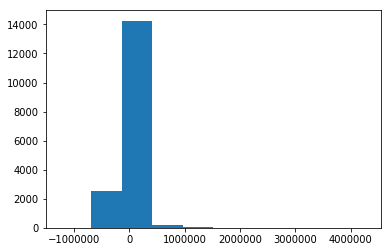

In [15]:
#Histogram of residuals
plt.hist(version1_resid)
plt.show()

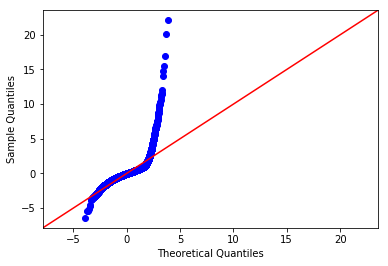

In [16]:
#QQ Plot of residuals
sm.graphics.qqplot(version1_resid, dist = stats.norm, line = '45', fit = True)
plt.show()

* Model 1 - version 1 conclusion:
        -This model was built on training data without transformation
        -Residuals do not follow a normal distribution as confirmed by qq plot, therefore this is not a reliable Model and need to try some transformations to normalize residuals



#### Q1 Model 1 - V2

Will transform variables to see if residuals normalize

In [17]:
#Log transform continuous variables to see if residuals follow a normal distribution
for feat in ['sqft_lot', 'sqft_living']:
    X[feat] = X[feat].map(lambda x: np.log(x))

y_train = y_train.map(lambda x: np.log(x))

Check multicollinearity after normalization: no multicollinearity found between independent variables

In [18]:
X.corr() > 0.75

,const,sqft_lot,sqft_living,zipcode_98001,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
const,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
zipcode_98001,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
zipcode_98002,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
zipcode_98003,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
zipcode_98004,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
zipcode_98005,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
zipcode_98006,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
zipcode_98007,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


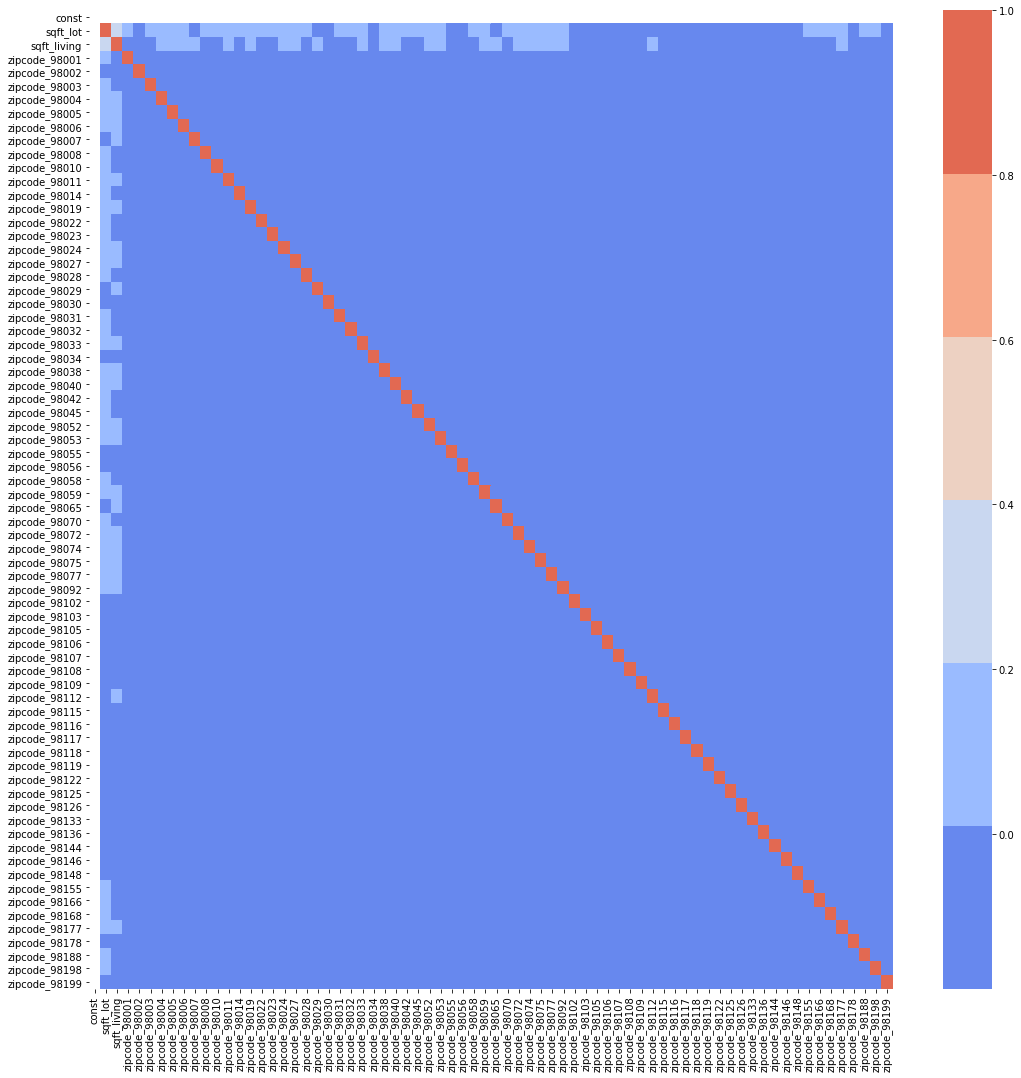

In [19]:
#Heatmap to check multicollinearity
corr = X.corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr, annot=False, fmt='.1g', cmap=sns.color_palette('coolwarm'))
plt.show()

Generate version2 of model

In [20]:
#Generate version2
linreg = sm.OLS(y_train,X).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     1138.
Date:                Mon, 29 Jul 2019   Prob (F-statistic):               0.00
Time:                        19:20:13   Log-Likelihood:                 1625.5
No. Observations:               17136   AIC:                            -3107.
Df Residuals:                   17064   BIC:                            -2549.
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             8.0084      0.053    149.785      0.000       7.904       8.113
sqft_lot          0.0700      0.002     28.792      0.000       0.065       0.075
sqft_living       0.7067      0.005    154.107      0.000       0.698       0.716
zipcode_98001    -1.4586      0.040    -36.823      0.000      -1.536      -1.381
zipcode_98002    -1.4864      0.041    -35.961      0.000      -1.567      -1.405
zipcode_98003    -1.4126      0.040    -35.165      0.000      -1.491      -1.334
zipcode_98004    -0.2343      0.040     -5.899      0.000      -0.312      -0.156
zipcode_98005    -0.6497      0.042    -15.557      0.000      -0.732      -0.568
zipcode_98006    -0.6821      0.039    -17.568      0.000      -0.758      -0.606
zipcode_98007    -0.7601      0.043    -17.753      0.000      -0.844      -0.676
zipcode_98008    -0.7448      0.040    -18.540      0.000      -0.823      -0.666
zipcode_98010    -1.2256      0.045    -27.198      0.000      -1.314      -1.137
zipcode_98011    -0.9993      0.041    -24.138      0.000      -1.080      -0.918
zipcode_98014    -1.1820      0.043    -27.217      0.000      -1.267      -1.097
zipcode_98019    -1.1588      0.042    -27.912      0.000      -1.240      -1.077
zipcode_98022    -1.3570      0.041    -33.398      0.000      -1.437      -1.277
zipcode_98023    -1.4645      0.039    -37.502      0.000      -1.541      -1.388
zipcode_98024    -1.0119      0.046    -21.980      0.000      -1.102      -0.922
zipcode_98027    -0.8987      0.039    -22.926      0.000      -0.976      -0.822
zipcode_98028    -1.0273      0.040    -25.595      0.000      -1.106      -0.949
zipcode_98029    -0.7568      0.040    -19.022      0.000      -0.835      -0.679
zipcode_98030    -1.4053      0.040    -34.730      0.000      -1.485      -1.326
zipcode_98031    -1.3844      0.040    -34.444      0.000      -1.463      -1.306
zipcode_98032    -1.4637      0.043    -33.866      0.000      -1.548      -1.379
zipcode_98033    -0.5978      0.039    -15.271      0.000      -0.674      -0.521
zipcode_98034    -0.8894      0.039    -22.900      0.000      -0.966      -0.813
zipcode_98038    -1.2760      0.039    -32.961      0.000      -1.352      -1.200
zipcode_98040    -0.3891      0.040     -9.689      0.000      -0.468      -0.310
zipcode_98042    -1.3733      0.039    -35.345      0.000      -1.449      -1.297
zipcode_98045    -1.1306      0.041    -27.441      0.000      -1.211      -1.050
zipcode_98052    -0.7674      0.039    -19.798      0.000      -0.843      -0.691
zipcode_98053    -0.8294      0.039    -21.094      0.000      -0.906      -0.752
zipcode_98055    -1.2904      0.041    -31.832      0.000      -1.370      -1.211
zipcode_98056    -1.0949      0.039    -27.855      0.000      -1.172      -1.018
zipcode_98058    -1.2821      0.039    -32.795   

Plot residuals of version2 to see if they follow a normal distribution

In [21]:
version2_resid = linreg.resid

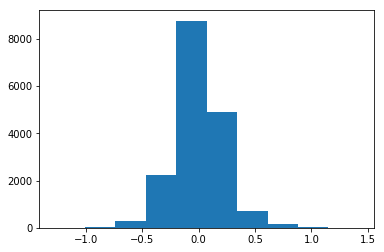

In [22]:
#Histogram of residuals
plt.hist(version2_resid)
plt.show()

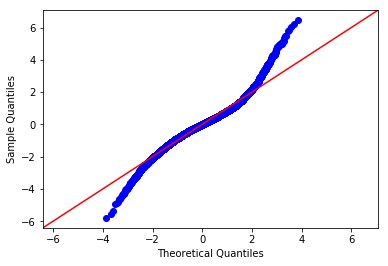

In [23]:
#QQ Plot of residuals
sm.graphics.qqplot(version2_resid, dist = stats.norm, line = '45', fit = True)
plt.show()

* Model 1 - version 2 concusion:
      -Log transformed my continuous variables to help normalize residual distr and get a better kurtosis/JB 
      -Confirmed that there is no multicollinearity between independent variables after transformation
      -QQ plot showed a better normal distribution of residuals compared to version 1 BUT distribution is still not normal; therefore, model is not reliable

#### Q1 Model 1 - V3

Will do stepwise regression and see if residual distribution gets better

In [24]:
#Model Fit: Stepwise Regression
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [25]:
result = stepwise_selection(X, y_train, verbose = True)
print('resulting features:')
print(result)

Add  const                          with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  zipcode_98004                  with p-value 5.38165e-181
Add  zipcode_98023                  with p-value 1.15222e-161
Add  zipcode_98042                  with p-value 4.15574e-131
Add  zipcode_98001                  with p-value 2.37185e-131
Add  zipcode_98112                  with p-value 9.39722e-124
Add  zipcode_98038                  with p-value 2.06836e-111
Add  zipcode_98092                  with p-value 3.3336e-116
Add  zipcode_98003                  with p-value 1.65664e-109
Add  zipcode_98002                  with p-value 1.01442e-109
Add  zipcode_98058                  with p-value 1.07824e-113
Add  zipcode_98031                  with p-value 1.83305e-121
Add  zipcode_98030                  with p-value 1.30438e-128
Add  zipcode_98168                  with p-value 3.61741e-129
Add  zipcode_98198                  with p-value 1.38334e-128
Add  zipcode_98040         

C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:44: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


Add  zipcode_98125                  with p-value 2.04631e-10
Add  zipcode_98053                  with p-value 1.00569e-06
Add  zipcode_98126                  with p-value 4.04497e-08
Add  zipcode_98074                  with p-value 4.57609e-05
resulting features:
['const', 'sqft_living', 'zipcode_98004', 'zipcode_98023', 'zipcode_98042', 'zipcode_98001', 'zipcode_98112', 'zipcode_98038', 'zipcode_98092', 'zipcode_98003', 'zipcode_98002', 'zipcode_98058', 'zipcode_98031', 'zipcode_98030', 'zipcode_98168', 'zipcode_98198', 'zipcode_98040', 'zipcode_98178', 'zipcode_98055', 'zipcode_98022', 'zipcode_98032', 'zipcode_98188', 'zipcode_98056', 'zipcode_98059', 'zipcode_98106', 'zipcode_98146', 'zipcode_98119', 'zipcode_98105', 'zipcode_98103', 'zipcode_98199', 'zipcode_98117', 'zipcode_98115', 'zipcode_98033', 'zipcode_98107', 'zipcode_98102', 'zipcode_98109', 'zipcode_98122', 'sqft_lot', 'zipcode_98116', 'zipcode_98006', 'zipcode_98136', 'zipcode_98144', 'zipcode_98019', 'zipcode_98005', 'z

In [26]:
feature_list = ['const', 'sqft_living', 'zipcode_98023', 'zipcode_98042', 'zipcode_98001', 'zipcode_98092', 'zipcode_98038', 'zipcode_98002', 'zipcode_98003', 'zipcode_98058', 'zipcode_98030', 'zipcode_98031', 'zipcode_98168', 'zipcode_98198', 'zipcode_98055', 'zipcode_98032', 'zipcode_98178', 'zipcode_98022', 'zipcode_98188', 'zipcode_98056', 'zipcode_98059', 'zipcode_98146', 'zipcode_98106', 'zipcode_98115', 'zipcode_98033', 'zipcode_98109', 'sqft_lot', 'zipcode_98019', 'zipcode_98045', 'zipcode_98148', 'zipcode_98010', 'zipcode_98014', 'zipcode_98166', 'zipcode_98155', 'zipcode_98108', 'zipcode_98065', 'zipcode_98028', 'zipcode_98133', 'zipcode_98118', 'zipcode_98011', 'zipcode_98070', 'zipcode_98072', 'zipcode_98077', 'zipcode_98024', 'zipcode_98034', 'zipcode_98027', 'zipcode_98125', 'zipcode_98053', 'zipcode_98126', 'zipcode_98074', 'zipcode_98075', 'zipcode_98052', 'zipcode_98177', 'zipcode_98029', 'zipcode_98008', 'zipcode_98007', 'zipcode_98006', 'zipcode_98144', 'zipcode_98136', 'zipcode_98005', 'zipcode_98116', 'zipcode_98117', 'zipcode_98103', 'zipcode_98122', 'zipcode_98107', 'zipcode_98199', 'zipcode_98040', 'zipcode_98105', 'zipcode_98119', 'zipcode_98102', 'zipcode_98112', 'zipcode_98004']

In [27]:
X = X[feature_list].copy()

In [28]:
#Generate model #3
linreg = sm.OLS(y_train,X).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     1138.
Date:                Mon, 29 Jul 2019   Prob (F-statistic):               0.00
Time:                        19:22:18   Log-Likelihood:                 1625.5
No. Observations:               17136   AIC:                            -3107.
Df Residuals:                   17064   BIC:                            -2549.
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             8.0084      0.053    149.785      0.000       7.904       8.113
sqft_living       0.7067      0.005    154.107      0.000       0.698       0.716
zipcode_98023    -1.4645      0.039    -37.502      0.000      -1.541      -1.388
zipcode_98042    -1.3733      0.039    -35.345      0.000      -1.449      -1.297
zipcode_98001    -1.4586      0.040    -36.823      0.000      -1.536      -1.381
zipcode_98092    -1.4032      0.040    -35.351      0.000      -1.481      -1.325
zipcode_98038    -1.2760      0.039    -32.961      0.000      -1.352      -1.200
zipcode_98002    -1.4864      0.041    -35.961      0.000      -1.567      -1.405
zipcode_98003    -1.4126      0.040    -35.165      0.000      -1.491      -1.334
zipcode_98058    -1.2821      0.039    -32.795      0.000      -1.359      -1.205
zipcode_98030    -1.4053      0.040    -34.730      0.000      -1.485      -1.326
zipcode_98031    -1.3844      0.040    -34.444      0.000      -1.463      -1.306
zipcode_98168    -1.4075      0.040    -34.913      0.000      -1.487      -1.328
zipcode_98198    -1.3534      0.040    -33.693      0.000      -1.432      -1.275
zipcode_98055    -1.2904      0.041    -31.832      0.000      -1.370      -1.211
zipcode_98032    -1.4637      0.043    -33.866      0.000      -1.548      -1.379
zipcode_98178    -1.2960      0.040    -32.015      0.000      -1.375      -1.217
zipcode_98022    -1.3570      0.041    -33.398      0.000      -1.437      -1.277
zipcode_98188    -1.3734      0.043    -32.171      0.000      -1.457      -1.290
zipcode_98056    -1.0949      0.039    -27.855      0.000      -1.172      -1.018
zipcode_98059    -1.0859      0.039    -27.741      0.000      -1.163      -1.009
zipcode_98146    -1.1535      0.040    -28.632      0.000      -1.232      -1.075
zipcode_98106    -1.0879      0.040    -27.245      0.000      -1.166      -1.010
zipcode_98115    -0.5834      0.039    -15.028      0.000      -0.660      -0.507
zipcode_98033    -0.5978      0.039    -15.271      0.000      -0.674      -0.521
zipcode_98109    -0.3537      0.045     -7.922      0.000      -0.441      -0.266
sqft_lot          0.0700      0.002     28.792      0.000       0.065       0.075
zipcode_98019    -1.1588      0.042    -27.912      0.000      -1.240      -1.077
zipcode_98045    -1.1306      0.041    -27.441      0.000      -1.211      -1.050
zipcode_98148    -1.3085      0.049    -26.622      0.000      -1.405      -1.212
zipcode_98010    -1.2256      0.045    -27.198      0.000      -1.314      -1.137
zipcode_98014    -1.1820      0.043    -27.217      0.000      -1.267      -1.097
zipcode_98166    -1.0741      0.040    -26.603      0.000      -1.153      -0.995
zipcode_98155    -1.0136      0.039    -25.782      0.000      -1.091      -0.937
zipcode_98108    -1.0837      0.042    -26.047   

In [29]:
version3_resid = linreg.resid

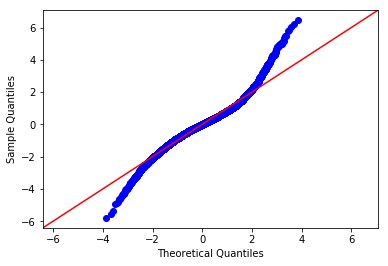

In [30]:
#QQ Plot of residuals
sm.graphics.qqplot(version3_resid, dist = stats.norm, line = '45', fit = True)
plt.show()

* Model 1 - version 3 conclusion:
         -Applied Model Fit: Stepwise selection. Same model as version2 resulted after running Stepwise selection
         -Residuals do not follow a normal distribution, therefore, model is not reliable
       

### 2.1.4 Test Model

In [31]:
#Transform test variables before testing the model
for feat in ['sqft_lot', 'sqft_living']:
    X_test[feat] = X_test[feat].map(lambda x: np.log(x))

y_test = y_test.map(lambda x: np.log(x))

In [32]:
#linreg variable has the model from version 3
y_hat_train = linreg.predict(X)
y_hat_test = linreg.predict(X_test)

In [33]:
#get the residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

Compare your predicted values, $\hat y$ with the actual value, $y$ using the Mean Squared Error from both training and test dataset
        
   MSE = $\frac{1}{n}\sum_{i=1}^{n}(y_{i} - \hat y_{i})^2$

In [34]:
#Calculate the Mean Squarred Error
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: 0.048431827788136136
Test Mean Squarred Error: 114.0864166627684


### 2.1.5 Conclusions: Q1 - Model 1

 In general, eventhough R-squared and Adjusted R-squared showed good numbers (0.827), Model 1 QQ plots were not satisfactory (residuals are very far from following a normal distribution). 
 
 Also, the difference of the Mean Squared Error between train data and test data is big, therefore Model 1 is overfitting and not reliable. The reason for the overfit could potentially be due to the big number of different zipcodes and each one of them having a separate dummy variable.
 
**Train Mean Squarred Error:** 0.04825382071143869

**Test Mean Squarred Error:** 115.4504831237798


         

## 2.2 Q1 - Model 2: Using dummy variables for each school district 

### 2.2.1 Preparing dataframe for Q1 - Model 2

Model 2 will use School Districts to perform analysis. School Districts were obtained based on Zipcode from original dataframe

1. Got the city name and zip code from this webpage: https://www.bestplaces.net/find/zip.aspx?county=53033&st=WA
2. Got King County School Districts from this webpage: https://www.kingcounty.gov/~/media/depts/elections/elections/maps/school-district-maps/school-districts.ashx?la=en
3. Put together "Schooldistrictcsv.csv" file to retrieve School District based on Zip Code. This file can be found in my GitHub repository

![King_County_School_Dist.PNG](King_County_School_Dist.PNG)

In [35]:
#Create a copy of dataframe to work on Model 2
df2 = df.copy()

Import Schooldistrictcsv.csv data to a pandas dataframe, prepare data and merge into the main dataframe for Model 2

In [36]:
#import data from csv file containing school district distribution based on zipcode
df_SchoolDist = pd.read_csv('Schooldistrictcsv.csv')

In [37]:
#Rename column from imported dataframe to match the main dataframe colum name for the merge
df_SchoolDist.rename(columns={"Zip_code": "zipcode"}, inplace=True)

In [38]:
#Change data type on df_SchoolDist before merging
df_SchoolDist['zipcode'] = df_SchoolDist['zipcode'].astype('category')
df_SchoolDist['School_District'] = df_SchoolDist['School_District'].astype('category')
df_SchoolDist['City'] = df_SchoolDist['City'].astype('category')

In [39]:
#Merge dataframes to have School District incorporated in main dataframe
df3 = df2.merge(df_SchoolDist, on='zipcode')

In [40]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21419
Data columns (total 23 columns):
id                 21420 non-null int64
date               21420 non-null datetime64[ns]
price              21420 non-null float64
bedrooms           21420 non-null int64
bathrooms          21420 non-null float64
sqft_living        21420 non-null int64
sqft_lot           21420 non-null int64
floors             21420 non-null float64
waterfront         21420 non-null category
view               21420 non-null category
condition          21420 non-null category
grade              21420 non-null category
sqft_above         21420 non-null int64
sqft_basement      21420 non-null float64
yr_built           21420 non-null int64
yr_renovated       21420 non-null category
zipcode            21420 non-null int64
lat                21420 non-null float64
long               21420 non-null float64
sqft_living15      21420 non-null int64
sqft_lot15         21420 non-null int64
City           

In [41]:
df3.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,City,School_District
0,7129300520,2014-10-13,221900.0,3,1.0,1180,5650,1.0,0.0,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,Bryn Mawr-Skyway,Renton
1,4060000240,2014-06-23,205425.0,2,1.0,880,6780,1.0,0.0,0.0,...,0.0,1945,0.0,98178,47.5009,-122.248,1190,6780,Bryn Mawr-Skyway,Renton


In [42]:
#Create dummies for each School District
School_District_dummies = pd.get_dummies(df3['School_District'], prefix='SchDist')

### 2.2.2 Generate Model 2 and perform feature engineering

#### Q1 - Model 2 - V1

In [45]:
#Select the dataframe for Q1 Model 2: dummy variables for every School District
df_model2 = df3[['price', 'sqft_lot', 'sqft_living']].copy()
df_model2 = pd.concat([df_model2, School_District_dummies], axis=1) 
#dropped the School Dist with lowest data available since we created categories
df_model2 = df_model2.drop(['SchDist_Skykomish'], axis=1) 

In [46]:
#Train/test split data
y= df_model2['price']
x= df_model2.drop(['price'], axis=1)

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

X=sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

(17136, 20) (17136,)
(4284, 20) (4284,)


In [47]:
#Generate version1
linreg = sm.OLS(y_train,X).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     1651.
Date:                Mon, 29 Jul 2019   Prob (F-statistic):               0.00
Time:                        19:22:19   Log-Likelihood:            -2.3509e+05
No. Observations:               17136   AIC:                         4.702e+05
Df Residuals:                   17116   BIC:                         4.704e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -6.988e+04   4676.960    -14.941      0.000    -7.9e+04   -6.07e+04
sqft_lot                      0.2289      0.043      5.367      0.000       0.145       0.312
sqft_living                 269.3321      1.977    136.234      0.000     265.457     273.207
SchDist_Auburn             -1.75e+05   1.01e+04    -17.302      0.000   -1.95e+05   -1.55e+05
SchDist_Bellevue           2.821e+05   6765.004     41.707      0.000    2.69e+05    2.95e+05
SchDist_Enumclaw          -1.099e+05   1.32e+04     -8.320      0.000   -1.36e+05    -8.4e+04
SchDist_Federal Way       -1.575e+05   6698.991    -23.517      0.000   -1.71e+05   -1.44e+05
SchDist_Highline          -4.317e+04   8975.328     -4.810      0.000   -6.08e+04   -2.56e+04
SchDist_Issaquah           2.642e+04   8991.498      2.938      0.003    8793.268     4.4e+04
SchDist_Kent              -1.489e+05   6219.810    -23.947      0.000   -1.61e+05   -1.37e+05
SchDist_Lake Washington    8.093e+04   5164.586     15.671      0.000    7.08e+04    9.11e+04
SchDist_Mercer Island      4.408e+05   1.42e+04     30.961      0.000    4.13e+05    4.69e+05
SchDist_Northshore        -3.384e+04   8024.906     -4.216      0.000   -4.96e+04   -1.81e+04
SchDist_Renton            -8.164e+04   6796.329    -12.012      0.000    -9.5e+04   -6.83e+04
SchDist_Riveview          -8.472e+04   1.33e+04     -6.379      0.000   -1.11e+05   -5.87e+04
SchDist_Seattle            1.703e+05   3874.577     43.950      0.000    1.63e+05    1.78e+05
SchDist_Shoreline          5.008e+04   9039.218      5.540      0.000    3.24e+04    6.78e+04
SchDist_Snoqualmie Valley -7.374e+04   9848.553     -7.487      0.000    -9.3e+04   -5.44e+04
SchDist_Tahoma            -1.483e+05   9981.612    -14.859      0.000   -1.68e+05   -1.29e+05
SchDist_Tukwila           -8.881e+04   1.48e+04     -5.998      0.000   -1.18e+05   -5.98e+04
SchDist_Vashon Island      2.505e+04    2.2e+04      1.139      0.255    -1.8e+04    6.81e+04
==============================================================================
Omnibus:                    15615.716   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1553044.649
Skew:                           4.019   Prob(JB):                         0.00
Kurtosis:                      48.940   Cond. No.                     4.02e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.13e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Plot residuals of version1 to see if they follow a normal distribution

In [48]:
Mod2_version1_resid = linreg.resid

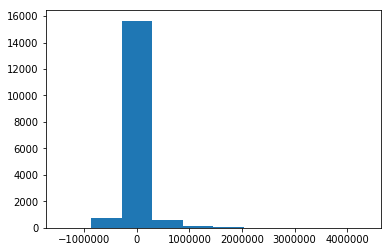

In [49]:
#Histogram of residuals
plt.hist(Mod2_version1_resid)
plt.show()

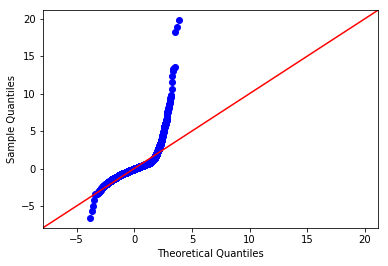

In [50]:
#QQ Plot of residuals
sm.graphics.qqplot(Mod2_version1_resid, dist = stats.norm, line = '45', fit = True)
plt.show()

#### Q1 - Model 2 - V2

Will drop variables with P-values > 0.05 (will have to split training/test data again after dropping variable) and will log transform variables to see if residuals follow a normal distribution

In [51]:
#Select the dataframe for Model 1: dummy variables for every zipcode
df_model2 = df3[['price', 'sqft_lot', 'sqft_living']].copy()
df_model2 = pd.concat([df_model2, School_District_dummies], axis=1) 
df_model2 = df_model2.drop(['SchDist_Skykomish'], axis=1) #dropped the School Dist with lowest data available since we created categories
df_model2 = df_model2.drop(['SchDist_Vashon Island'], axis=1) #dropping due to p-value

In [52]:
#Split data into train/test after dropping new variable
y= df_model2['price']
x= df_model2.drop(['price'], axis=1)

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

X=sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

(17136, 19) (17136,)
(4284, 19) (4284,)


In [53]:
#Log transform continuous variables to see if residuals follow a normal distribution
for feat in ['sqft_lot', 'sqft_living']:
    X[feat] = X[feat].map(lambda x: np.log(x))

y_train = y_train.map(lambda x: np.log(x))

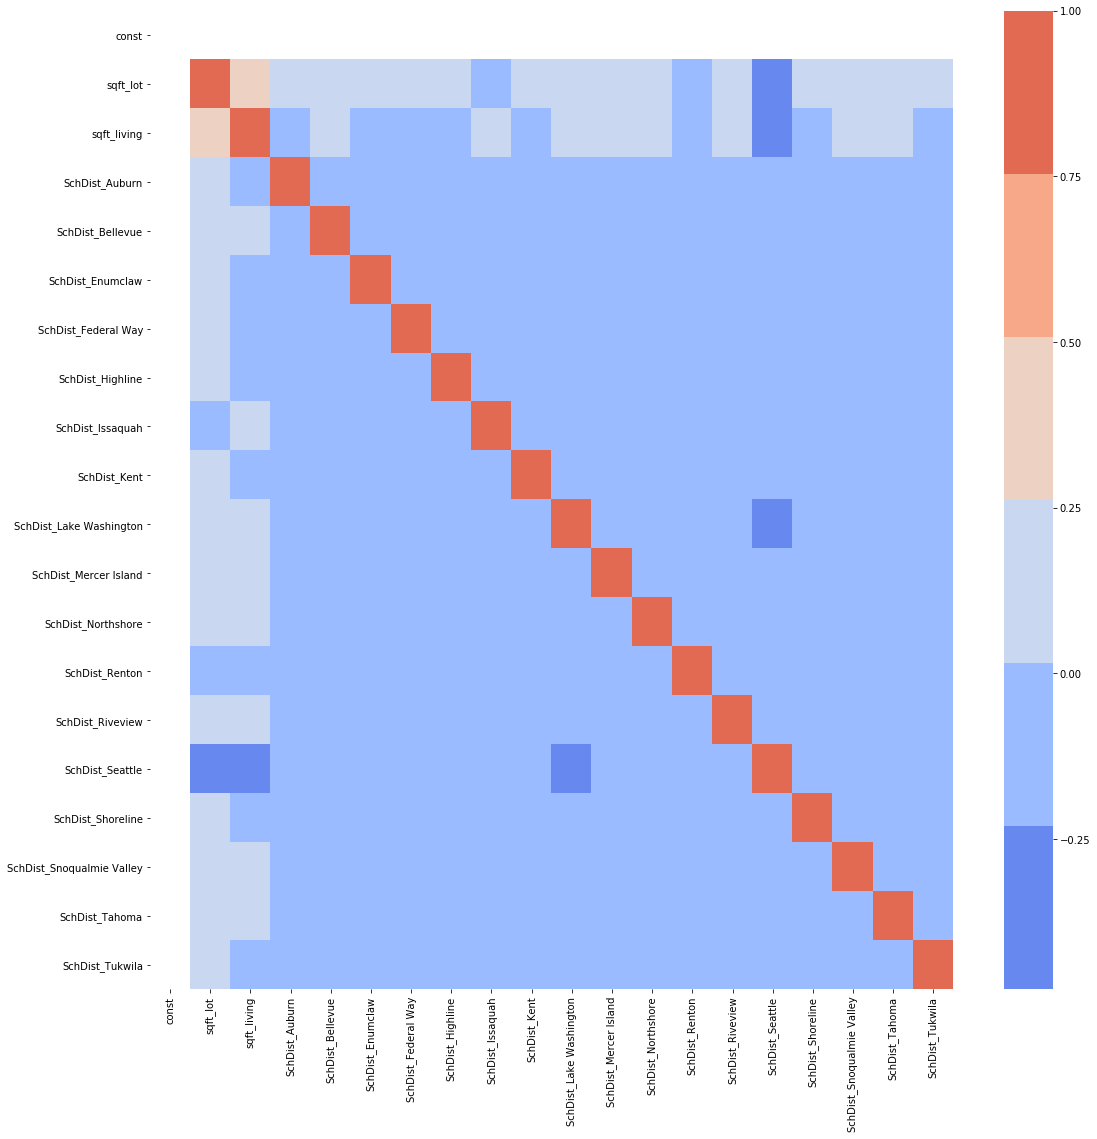

In [54]:
#Heatmap to check multicollinearity
corr = X.corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr, annot=False, fmt='.1g', cmap=sns.color_palette('coolwarm'))
plt.show()

No multicollinearity found after correlation analysis via heatmap

In [55]:
#Generate version2
linreg = sm.OLS(y_train,X).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     2626.
Date:                Mon, 29 Jul 2019   Prob (F-statistic):               0.00
Time:                        19:22:21   Log-Likelihood:                -1631.6
No. Observations:               17136   AIC:                             3303.
Df Residuals:                   17116   BIC:                             3458.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         6.7647      0.051    132.194      0.000       6.664       6.865
sqft_lot                      0.0464      0.003     16.871      0.000       0.041       0.052
sqft_living                   0.7744      0.005    145.717      0.000       0.764       0.785
SchDist_Auburn               -0.4761      0.031    -15.372      0.000      -0.537      -0.415
SchDist_Bellevue              0.3706      0.029     12.608      0.000       0.313       0.428
SchDist_Enumclaw             -0.3486      0.032    -10.766      0.000      -0.412      -0.285
SchDist_Federal Way          -0.4740      0.029    -16.142      0.000      -0.532      -0.416
SchDist_Highline             -0.2245      0.030     -7.401      0.000      -0.284      -0.165
SchDist_Issaquah              0.1052      0.030      3.454      0.001       0.046       0.165
SchDist_Kent                 -0.4132      0.029    -14.148      0.000      -0.470      -0.356
SchDist_Lake Washington       0.1623      0.029      5.616      0.000       0.106       0.219
SchDist_Mercer Island         0.5088      0.034     15.117      0.000       0.443       0.575
SchDist_Northshore           -0.0381      0.030     -1.279      0.201      -0.097       0.020
SchDist_Renton               -0.2146      0.029     -7.280      0.000      -0.272      -0.157
SchDist_Riveview             -0.1999      0.033     -6.100      0.000      -0.264      -0.136
SchDist_Seattle               0.2723      0.029      9.414      0.000       0.216       0.329
SchDist_Shoreline             0.0347      0.030      1.140      0.255      -0.025       0.094
SchDist_Snoqualmie Valley    -0.1028      0.031     -3.354      0.001      -0.163      -0.043
SchDist_Tahoma               -0.3328      0.031    -10.760      0.000      -0.393      -0.272
SchDist_Tukwila              -0.4592      0.034    -13.644      0.000      -0.525      -0.393
==============================================================================
Omnibus:                      664.267   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1899.827
Skew:                           0.127   Prob(JB):                         0.00
Kurtosis:                       4.611   Cond. No.                         704.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Plot residuals of version2 to see if they follow a normal distribution

In [56]:
Mod2_version2_resid = linreg.resid

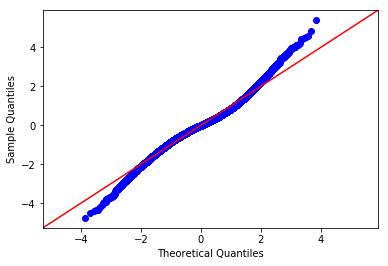

In [57]:
#QQ Plot of residuals
sm.graphics.qqplot(Mod2_version2_resid, dist = stats.norm, line = '45', fit = True)
plt.show()

#### Q1 - Model 2 - V3

Will drop variables with P-values > 0.05 from version 2. Follow same steps from Model 2 version 2

In [58]:
#Select the dataframe for Model 1: dummy variables for every zipcode
df_model2 = df3[['price', 'sqft_lot', 'sqft_living']].copy()
df_model2 = pd.concat([df_model2, School_District_dummies], axis=1) 
df_model2 = df_model2.drop(['SchDist_Skykomish'], axis=1) #dropped the School Dist with lowest data available since we created categories
df_model2 = df_model2.drop(['SchDist_Vashon Island'], axis=1) #dropping due to p-value from version 1
df_model2 = df_model2.drop(['SchDist_Northshore'], axis=1) #dropping due to p-value from version 2

In [59]:
#Split data into train/test after dropping new variable
y= df_model2['price']
x= df_model2.drop(['price'], axis=1)

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

X=sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

(17136, 18) (17136,)
(4284, 18) (4284,)


In [60]:
#Log transform continuous variables to see if residuals follow a normal distribution
for feat in ['sqft_lot', 'sqft_living']:
    X[feat] = X[feat].map(lambda x: np.log(x))

y_train = y_train.map(lambda x: np.log(x))

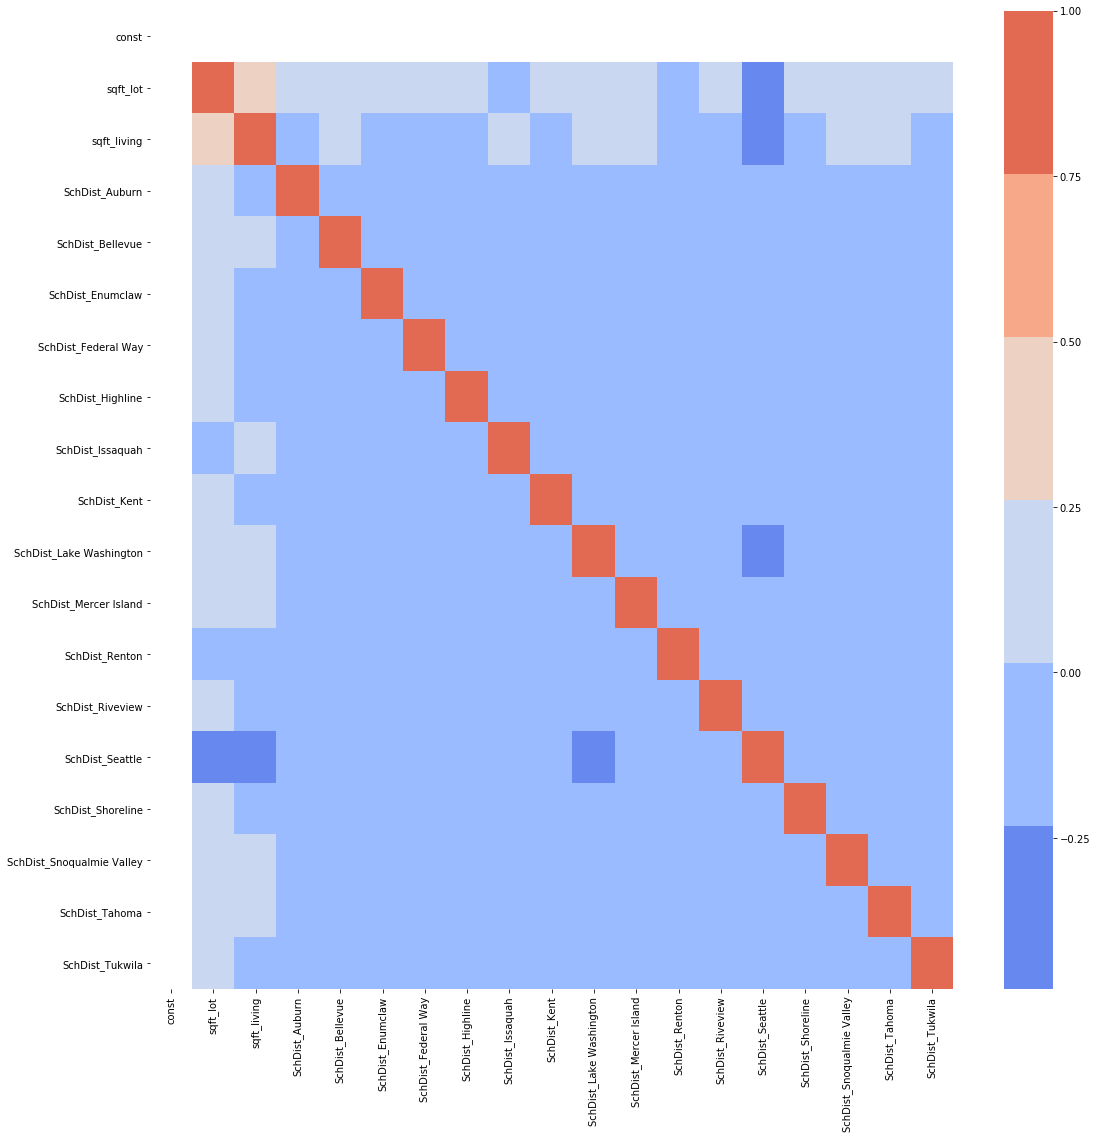

In [61]:
#Heatmap to check multicollinearity
corr = X.corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr, annot=False, fmt='.1g', cmap=sns.color_palette('coolwarm'))
plt.show()

In [62]:
#Generate version3
linreg = sm.OLS(y_train,X).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     2829.
Date:                Mon, 29 Jul 2019   Prob (F-statistic):               0.00
Time:                        19:22:22   Log-Likelihood:                -1548.2
No. Observations:               17136   AIC:                             3134.
Df Residuals:                   17117   BIC:                             3282.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         6.7375      0.043    155.515      0.000       6.653       6.822
sqft_lot                      0.0452      0.003     16.610      0.000       0.040       0.051
sqft_living                   0.7752      0.005    146.740      0.000       0.765       0.786
SchDist_Auburn               -0.4466      0.016    -28.393      0.000      -0.477      -0.416
SchDist_Bellevue              0.3935      0.012     32.762      0.000       0.370       0.417
SchDist_Enumclaw             -0.3175      0.019    -17.156      0.000      -0.354      -0.281
SchDist_Federal Way          -0.4421      0.012    -36.510      0.000      -0.466      -0.418
SchDist_Highline             -0.1787      0.014    -12.517      0.000      -0.207      -0.151
SchDist_Issaquah              0.1339      0.014      9.320      0.000       0.106       0.162
SchDist_Kent                 -0.3792      0.012    -32.497      0.000      -0.402      -0.356
SchDist_Lake Washington       0.1950      0.011     18.077      0.000       0.174       0.216
SchDist_Mercer Island         0.5652      0.020     28.535      0.000       0.526       0.604
SchDist_Renton               -0.1904      0.012    -15.604      0.000      -0.214      -0.166
SchDist_Riveview             -0.1619      0.019     -8.512      0.000      -0.199      -0.125
SchDist_Seattle               0.3103      0.010     29.740      0.000       0.290       0.331
SchDist_Shoreline             0.0644      0.014      4.456      0.000       0.036       0.093
SchDist_Snoqualmie Valley    -0.0686      0.015     -4.585      0.000      -0.098      -0.039
SchDist_Tahoma               -0.2991      0.015    -19.588      0.000      -0.329      -0.269
SchDist_Tukwila              -0.4242      0.021    -20.578      0.000      -0.465      -0.384
==============================================================================
Omnibus:                      712.251   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2100.582
Skew:                           0.142   Prob(JB):                         0.00
Kurtosis:                       4.692   Cond. No.                         275.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Plot residuals of version3 to see if they follow a normal distribution

In [63]:
Mod2_version3_resid = linreg.resid

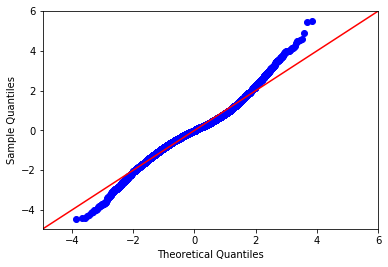

In [64]:
#QQ Plot of residuals
sm.graphics.qqplot(Mod2_version3_resid, dist = stats.norm, line = '45', fit = True)
plt.show()

#### Q1 - Model 2 - V4

Will perform Stepwise selection to see if the current model can be simplified

In [65]:
result = stepwise_selection(X, y_train, verbose = True)
print('resulting features:')
print(result)

Add  SchDist_Bellevue               with p-value 0.0
Add  const                          with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  SchDist_Federal Way            with p-value 0.0
Add  SchDist_Seattle                with p-value 0.0
Add  SchDist_Lake Washington        with p-value 0.0
Add  SchDist_Mercer Island          with p-value 6.71504e-290
Add  SchDist_Kent                   with p-value 4.0095e-179
Add  SchDist_Auburn                 with p-value 2.18245e-126
Add  SchDist_Issaquah               with p-value 2.0996e-93
Add  SchDist_Shoreline              with p-value 1.55948e-72
Add  sqft_lot                       with p-value 1.39497e-76
Add  SchDist_Tukwila                with p-value 4.74001e-44
Add  SchDist_Tahoma                 with p-value 5.41068e-36
Add  SchDist_Enumclaw               with p-value 9.93436e-33
Add  SchDist_Renton                 with p-value 5.51067e-27
Add  SchDist_Highline               with p-value 1.31866e-24
Add  SchDi

In [66]:
feature_list = ['sqft_living', 'SchDist_Federal Way', 'SchDist_Seattle', 'SchDist_Bellevue', 'const', 'SchDist_Lake Washington', 'SchDist_Mercer Island', 'SchDist_Kent', 'SchDist_Auburn', 'SchDist_Issaquah', 'SchDist_Shoreline', 'sqft_lot', 'SchDist_Tukwila', 'SchDist_Tahoma', 'SchDist_Enumclaw', 'SchDist_Renton', 'SchDist_Highline', 'SchDist_Riveview', 'SchDist_Snoqualmie Valley']

No variables will be disposed due to Stepwise selection

### 2.2.3 Test Model

Will test Q1 Model 2 - Version 3 as this model presented a reasonable QQ plot and good indicators from the OLS Summary

In [67]:
#Transform test variables before testing the model
for feat in ['sqft_lot', 'sqft_living']:
    X_test[feat] = X_test[feat].map(lambda x: np.log(x))

y_test = y_test.map(lambda x: np.log(x))

In [68]:
#linreg variable has the model from version 3
y_hat_train = linreg.predict(X)
y_hat_test = linreg.predict(X_test)

In [69]:
#get the residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

Compare your predicted values, $\hat y$ with the actual value, $y$ using the Mean Squared Error from both training and test dataset
        
   MSE = $\frac{1}{n}\sum_{i=1}^{n}(y_{i} - \hat y_{i})^2$

In [70]:
#Calculate the Mean Squarred Error
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: 0.07014580077234954
Test Mean Squarred Error: 0.07197066945575076


### 2.2.4 Conclusions: Q1 -  Model 2

## 2.3 Q1 - Model 2 - Conclusions and Data Visualization

-----Plotting predicted values for house price using Model 2.

In [71]:
x = df_model2.drop(['price'], axis=1)
X = sm.add_constant(x)

In [72]:
predicted_price = linreg.predict(X)

In [73]:
predicted_price = predicted_price.to_frame()

In [74]:
predicted_price.rename(columns={0: "predicted_price"}, inplace=True)

In [75]:
lat_long = df3[['lat', 'long']].copy()

In [76]:
df5 = df_model2.merge(lat_long, how='inner', left_index=True, right_index=True)

In [77]:
df6 = df5.merge(predicted_price, how='inner', left_index=True, right_index=True)

In [78]:
scaled_pred_price = (df6['predicted_price']-min(df6['predicted_price']))/(max(df6['predicted_price'])-min(df6['predicted_price']))
scaled_living = (df6['sqft_living']-min(df6['sqft_living']))/(max(df6['sqft_living'])-min(df6['sqft_living']))
df6['scaled_pred_price'] = scaled_pred_price
df6['scaled_sqft_living'] = scaled_living

In [79]:
scaled_living = (df6['sqft_living']-min(df6['sqft_living']))/(max(df6['sqft_living'])-min(df6['sqft_living']))
df6['scaled_sqft_living'] = scaled_living

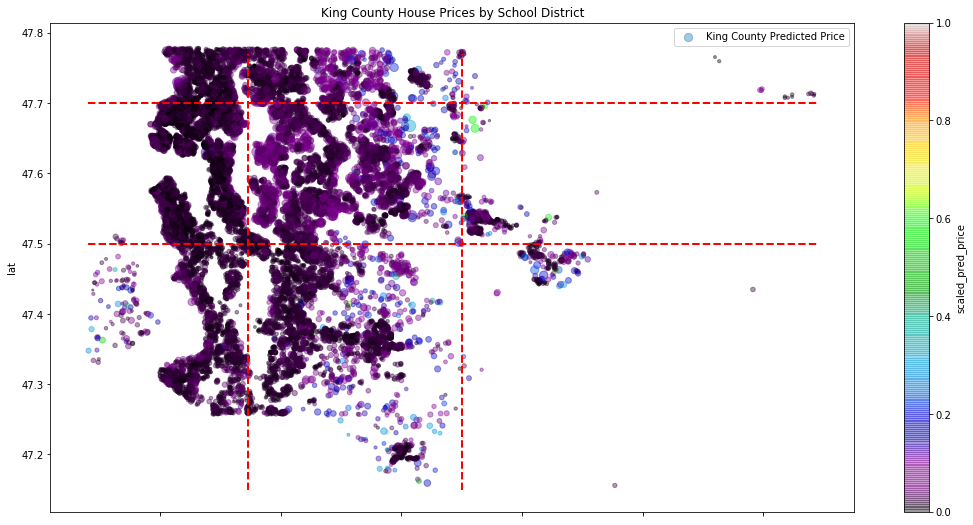

In [153]:
df6.plot(kind="scatter", x="long", y="lat", label="King County Predicted Price", s=df6['sqft_living']/100,
    c='scaled_pred_price', cmap=plt.get_cmap("nipy_spectral"),
    colorbar=True, alpha=0.4, figsize=(18,9),
)

plt.plot((-122.52, -121.31), (47.7, 47.7), 'r--', lw=2)
plt.plot((-122.52, -121.31), (47.5, 47.5), 'r--', lw=2)
plt.plot((-122.255, -122.255), (47.15, 47.77), 'r--', lw=2)
plt.plot((-121.9, -121.9), (47.15, 47.77), 'r--', lw=2)
plt.title("King County House Prices by School District")
plt.legend()
plt.show()

Above scatter plot shows lighter colors in school districts Enumclaw, Riverview, Vashon Island. None of those school districts were in our top 7 from our Model. Will have to confirm if sqft_living or sqft_lot have something to do with this difference in price.

-----Plotting House sqft based on School District

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

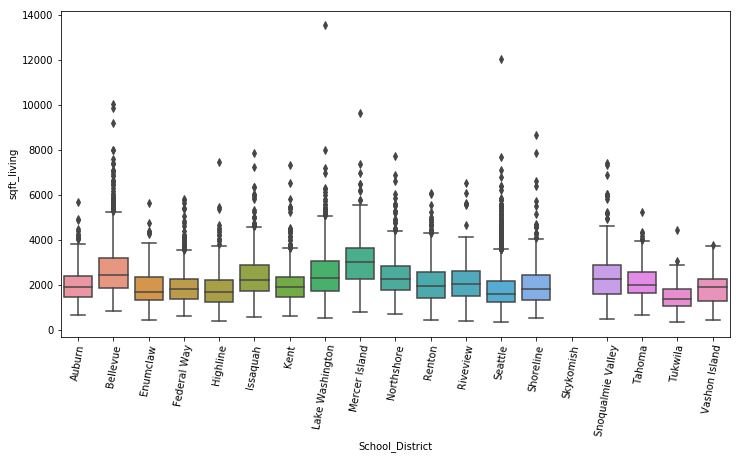

In [251]:
#Plot sqft_living for each school district to have a reference of the difference in colors in map
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x="School_District", y="sqft_living", data=df3)
plt.xticks(rotation=80)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

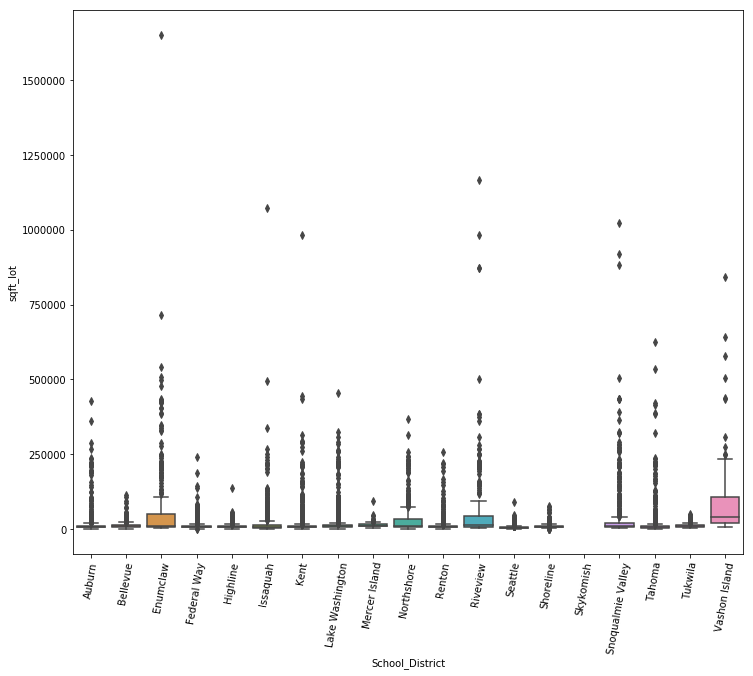

In [258]:
#Plot sqft_lot for each school district to have a reference of the difference in colors in map
plt.figure(figsize=(12, 10))
ax = sns.boxplot(x="School_District", y="sqft_lot", data=df3)
plt.xticks(rotation=80)

Above graphs help us confirm that the sqft_lot in school districts Enumclaw, Riverview, Vashon Island have significantly bigger lots. 

In [261]:
df3.loc[df3['School_District'] == 'Mercer Island']

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,City,School_District
6260,2524049179,2014-08-26,2000000.0,3,2.75,3050,44867,1.0,0.0,4.0,...,720.0,1968,0.0,98040,47.5316,-122.233,4110,20336,Mercer Island,Mercer Island
6261,1483300570,2014-09-08,905000.0,4,2.50,3300,10250,1.0,0.0,0.0,...,910.0,1946,1.0,98040,47.5873,-122.249,1950,6045,Mercer Island,Mercer Island
6262,2287000060,2014-09-12,799000.0,3,2.50,2140,9897,1.0,0.0,0.0,...,0.0,1959,0.0,98040,47.5505,-122.219,2680,10083,Mercer Island,Mercer Island
6263,3456000310,2014-08-04,840000.0,4,1.75,2480,11010,1.0,0.0,0.0,...,850.0,1966,0.0,98040,47.5378,-122.219,2770,10744,Mercer Island,Mercer Island
6264,46100204,2015-02-21,1510000.0,5,3.00,3300,33474,1.0,0.0,3.0,...,1430.0,1957,1.0,98040,47.5673,-122.210,3836,20953,Mercer Island,Mercer Island
6265,191100045,2014-07-03,940000.0,4,2.00,2490,9525,2.0,0.0,0.0,...,0.0,1968,0.0,98040,47.5639,-122.217,2770,9525,Mercer Island,Mercer Island
6266,2757000030,2014-09-22,855000.0,4,2.75,2270,10460,2.0,0.0,0.0,...,0.0,1965,0.0,98040,47.5603,-122.222,2610,10180,Mercer Island,Mercer Island
6267,8651600160,2014-11-11,799000.0,4,2.25,2510,11585,2.0,0.0,0.0,...,0.0,1969,0.0,98040,47.5483,-122.226,2450,9691,Mercer Island,Mercer Island
6268,1923000030,2014-07-28,1120000.0,4,2.50,3840,16619,2.0,0.0,1.0,...,0.0,1983,0.0,98040,47.5634,-122.213,3600,16553,Mercer Island,Mercer Island
6269,2287000030,2014-10-14,811000.0,3,1.75,1870,9897,1.0,0.0,0.0,...,0.0,1960,0.0,98040,47.5505,-122.221,1900,10005,Mercer Island,Mercer Island


# 3. Q2: How does condition & grade affect house prices based on location? 

## 3.1  Q2 - Model 1: Using dummy variables for each condition and grade

### 3.1.1 Preparing Dataframe for Q2 - Model 1

This dataframe will include sqft_living, sqft_lot, school_dictrict, condition and grade

In [89]:
#Create a copy of dataframe to work on Question 2
dfQ2 = df.copy()

In [90]:
dfQ2 = dfQ2.merge(df_SchoolDist, on='zipcode')

In [91]:
#Create dummies for each grade, condition, and school district
grade_dummies = pd.get_dummies(dfQ2['grade'], prefix='grade')
condition_dummies = pd.get_dummies(dfQ2['condition'], prefix='condit')
School_District_dummies = pd.get_dummies(dfQ2['School_District'], prefix='SchDist')

### 3.1.2 Generate Model1 for Q2 and perform feature engineering

#### Q2 - Model 1 - V1

This version of the model has all variables (except one of the dummie categorical variables).This version of the model has no variable transformations.

In [92]:
#Put together working dataframe for Q2-Model 1-V1
dfQ2_1 = dfQ2[['price', 'sqft_lot', 'sqft_living']].copy()
dfQ2_1 = pd.concat([dfQ2_1, School_District_dummies, grade_dummies, condition_dummies], axis=1) 
dfQ2_1 = dfQ2_1.drop(['SchDist_Skykomish'], axis=1) 
dfQ2_1 = dfQ2_1.drop(['grade_13'], axis=1) 
dfQ2_1 = dfQ2_1.drop(['condit_1'], axis=1)

In [93]:
#Train/test split
y= dfQ2_1['price']
x= dfQ2_1.drop(['price'], axis=1)

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

X=sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

(17136, 34) (17136,)
(4284, 34) (4284,)


In [94]:
# #Generate Q2 - Model 1 - V1
linregQ2 = sm.OLS(y_train,X).fit()
linregQ2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     1304.
Date:                Mon, 29 Jul 2019   Prob (F-statistic):               0.00
Time:                        19:31:38   Log-Likelihood:            -2.3338e+05
No. Observations:               17136   AIC:                         4.668e+05
Df Residuals:                   17102   BIC:                         4.671e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      2.221e+06   6.97e+04     31.854      0.000    2.08e+06    2.36e+06
sqft_lot                      0.1427      0.040      3.610      0.000       0.065       0.220
sqft_living                 172.5804      2.706     63.787      0.000     167.277     177.884
SchDist_Auburn            -4.114e+04   1.01e+04     -4.076      0.000   -6.09e+04   -2.14e+04
SchDist_Bellevue            3.64e+05   7177.465     50.713      0.000     3.5e+05    3.78e+05
SchDist_Enumclaw           1.329e+04   1.27e+04      1.043      0.297   -1.17e+04    3.83e+04
SchDist_Federal Way       -1.959e+04   7190.148     -2.725      0.006   -3.37e+04   -5498.726
SchDist_Highline           9.657e+04   9141.242     10.564      0.000    7.86e+04    1.14e+05
SchDist_Issaquah           1.437e+05   8954.798     16.043      0.000    1.26e+05    1.61e+05
SchDist_Kent              -1.462e+04   6887.666     -2.123      0.034   -2.81e+04   -1123.711
SchDist_Lake Washington    1.997e+05   6101.401     32.733      0.000    1.88e+05    2.12e+05
SchDist_Mercer Island       5.08e+05   1.37e+04     37.072      0.000    4.81e+05    5.35e+05
SchDist_Northshore         1.023e+05   8207.560     12.467      0.000    8.62e+04    1.18e+05
SchDist_Renton             4.888e+04   7261.071      6.732      0.000    3.47e+04    6.31e+04
SchDist_Riveview           7.364e+04   1.31e+04      5.606      0.000    4.79e+04    9.94e+04
SchDist_Seattle            2.864e+05   5129.904     55.830      0.000    2.76e+05    2.96e+05
SchDist_Shoreline          1.684e+05   9176.186     18.346      0.000     1.5e+05    1.86e+05
SchDist_Snoqualmie Valley  8.015e+04   9747.279      8.222      0.000     6.1e+04    9.93e+04
SchDist_Tahoma             1.207e+04   9724.117      1.241      0.215   -6994.923    3.11e+04
SchDist_Tukwila            5.001e+04   1.39e+04      3.586      0.000    2.27e+04    7.73e+04
SchDist_Vashon Island       1.49e+05   1.97e+04      7.561      0.000     1.1e+05    1.88e+05
grade_3                   -2.168e+06   2.09e+05    -10.396      0.000   -2.58e+06   -1.76e+06
grade_4                   -2.231e+06   7.46e+04    -29.903      0.000   -2.38e+06   -2.08e+06
grade_5                   -2.293e+06   6.21e+04    -36.918      0.000   -2.41e+06   -2.17e+06
grade_6                    -2.32e+06   6.03e+04    -38.467      0.000   -2.44e+06    -2.2e+06
grade_7                   -2.302e+06   5.98e+04    -38.532      0.000   -2.42e+06   -2.19e+06
grade_8                   -2.255e+06   5.94e+04    -37.946      0.000   -2.37e+06   -2.14e+06
grade_9                    -2.15e+06   5.91e+04    -36.368      0.000   -2.27e+06   -2.03e+06
grade_10                      -2e+06    5.9e+04    -33.914      0.000   -2.12e+06   -1.88e+06
grade_11                  -1.718e+06   5.93e+04    -28.983      0.000   -1.

Plot residuals of version1 to see if they follow a normal distribution

In [95]:
Q2_Model1_resid = linregQ2.resid

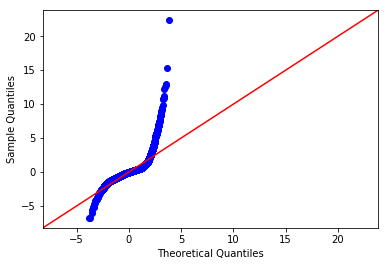

In [96]:
#QQ Plot of residuals
sm.graphics.qqplot(Q2_Model1_resid, dist = stats.norm, line = '45', fit = True)
plt.show()

#### Q2 - Model 1 - V2

Will drop variables with P-values > 0.05 (will have to split training/test data again after dropping variable)

In [97]:
#Put together working dataframe for Q2-Model 1-V2
dfQ2_2 = dfQ2[['price', 'sqft_lot', 'sqft_living']].copy()
dfQ2_2 = pd.concat([dfQ2_2, School_District_dummies, grade_dummies, condition_dummies], axis=1) 
dfQ2_2 = dfQ2_2.drop(['SchDist_Skykomish'], axis=1) 
dfQ2_2 = dfQ2_2.drop(['grade_13'], axis=1)
dfQ2_2 = dfQ2_2.drop(['condit_1'], axis=1)
dfQ2_2 = dfQ2_2.drop(['SchDist_Enumclaw'], axis=1) 
dfQ2_2 = dfQ2_2.drop(['SchDist_Tahoma'], axis=1)
dfQ2_2 = dfQ2_2.drop(['condit_2'], axis=1)
dfQ2_2 = dfQ2_2.drop(['condit_3'], axis=1)
dfQ2_2 = dfQ2_2.drop(['condit_4'], axis=1)

In [98]:
#Train/test split
y= dfQ2_2['price']
x= dfQ2_2.drop(['price'], axis=1)

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

X=sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

(17136, 29) (17136,)
(4284, 29) (4284,)


In [99]:
# #Generate Q2 - Model 1 - V2
linregQ2 = sm.OLS(y_train,X).fit()
linregQ2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     1445.
Date:                Mon, 29 Jul 2019   Prob (F-statistic):               0.00
Time:                        19:47:57   Log-Likelihood:            -2.3323e+05
No. Observations:               17136   AIC:                         4.665e+05
Df Residuals:                   17106   BIC:                         4.668e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      2.045e+06   6.08e+04     33.653      0.000    1.93e+06    2.16e+06
sqft_lot                      0.2220      0.039      5.743      0.000       0.146       0.298
sqft_living                 171.4221      2.658     64.493      0.000     166.212     176.632
SchDist_Auburn            -4.609e+04   1.19e+04     -3.859      0.000   -6.95e+04   -2.27e+04
SchDist_Bellevue           3.579e+05   9514.212     37.622      0.000    3.39e+05    3.77e+05
SchDist_Federal Way       -3.374e+04   9474.634     -3.561      0.000   -5.23e+04   -1.52e+04
SchDist_Highline           7.451e+04   1.11e+04      6.700      0.000    5.27e+04    9.63e+04
SchDist_Issaquah           1.309e+05   1.11e+04     11.833      0.000    1.09e+05    1.53e+05
SchDist_Kent              -2.365e+04   9151.927     -2.584      0.010   -4.16e+04   -5712.140
SchDist_Lake Washington    1.882e+05   8580.986     21.932      0.000    1.71e+05    2.05e+05
SchDist_Mercer Island      5.038e+05   1.52e+04     33.050      0.000    4.74e+05    5.34e+05
SchDist_Northshore         8.979e+04   1.02e+04      8.771      0.000    6.97e+04     1.1e+05
SchDist_Renton              3.22e+04   9473.936      3.399      0.001    1.36e+04    5.08e+04
SchDist_Riveview            4.97e+04   1.46e+04      3.405      0.001    2.11e+04    7.83e+04
SchDist_Seattle            2.724e+05   7945.558     34.278      0.000    2.57e+05    2.88e+05
SchDist_Shoreline           1.61e+05   1.12e+04     14.319      0.000    1.39e+05    1.83e+05
SchDist_Snoqualmie Valley  6.796e+04   1.16e+04      5.877      0.000    4.53e+04    9.06e+04
SchDist_Tukwila            2.422e+04   1.56e+04      1.550      0.121   -6410.203    5.48e+04
SchDist_Vashon Island      1.387e+05   2.15e+04      6.454      0.000    9.66e+04    1.81e+05
grade_3                   -1.952e+06   2.06e+05     -9.455      0.000   -2.36e+06   -1.55e+06
grade_4                   -2.032e+06   7.31e+04    -27.803      0.000   -2.18e+06   -1.89e+06
grade_5                   -2.065e+06   6.12e+04    -33.722      0.000   -2.18e+06   -1.94e+06
grade_6                   -2.102e+06   5.95e+04    -35.304      0.000   -2.22e+06   -1.99e+06
grade_7                   -2.087e+06    5.9e+04    -35.372      0.000    -2.2e+06   -1.97e+06
grade_8                   -2.045e+06   5.87e+04    -34.837      0.000   -2.16e+06   -1.93e+06
grade_9                   -1.945e+06   5.84e+04    -33.281      0.000   -2.06e+06   -1.83e+06
grade_10                  -1.794e+06   5.83e+04    -30.767      0.000   -1.91e+06   -1.68e+06
grade_11                  -1.544e+06   5.87e+04    -26.323      0.000   -1.66e+06   -1.43e+06
grade_12                  -1.096e+06   6.22e+04    -17.633      0.000   -1.22e+06   -9.74e+05
condit_5                   7.703e+04   5666.224     13.594      0.000    6.

Plot residuals of version2 to see if they follow a normal distribution

In [100]:
Q2_Model1_resid = linregQ2.resid

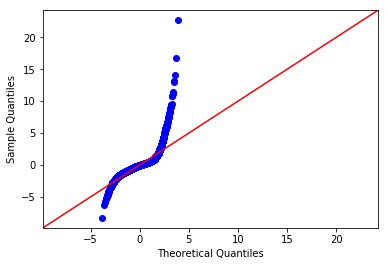

In [101]:
#QQ Plot of residuals
sm.graphics.qqplot(Q2_Model1_resid, dist = stats.norm, line = '45', fit = True)
plt.show()

#### Q2 - Model 1 - V3

Will drop variables with P-values > 0.05 (will have to split training/test data again after dropping variable) and will log transform continuous variables to see if residuals follow a normal distribution

In [102]:
#Put together working dataframe for Q2-Model 1-V3
dfQ2_3 = dfQ2[['price', 'sqft_lot', 'sqft_living']].copy()
dfQ2_3 = pd.concat([dfQ2_3, School_District_dummies, grade_dummies, condition_dummies], axis=1) 
dfQ2_3 = dfQ2_3.drop(['SchDist_Skykomish'], axis=1) 
dfQ2_3 = dfQ2_3.drop(['grade_13'], axis=1)
dfQ2_3 = dfQ2_3.drop(['condit_1'], axis=1)
dfQ2_3 = dfQ2_3.drop(['SchDist_Enumclaw'], axis=1) 
dfQ2_3 = dfQ2_3.drop(['SchDist_Tahoma'], axis=1)
dfQ2_3 = dfQ2_3.drop(['condit_2'], axis=1)
dfQ2_3 = dfQ2_3.drop(['condit_3'], axis=1)
dfQ2_3 = dfQ2_3.drop(['condit_4'], axis=1)
dfQ2_3 = dfQ2_3.drop(['SchDist_Tukwila'], axis=1)

In [103]:
#Train/test split
y= dfQ2_3['price']
x= dfQ2_3.drop(['price'], axis=1)

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

X=sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

(17136, 28) (17136,)
(4284, 28) (4284,)


In [105]:
#Log transform continuous variables to see if residuals follow a normal distribution
for feat in ['sqft_lot', 'sqft_living']:
    X[feat] = X[feat].map(lambda x: np.log(x))

y_train = y_train.map(lambda x: np.log(x))

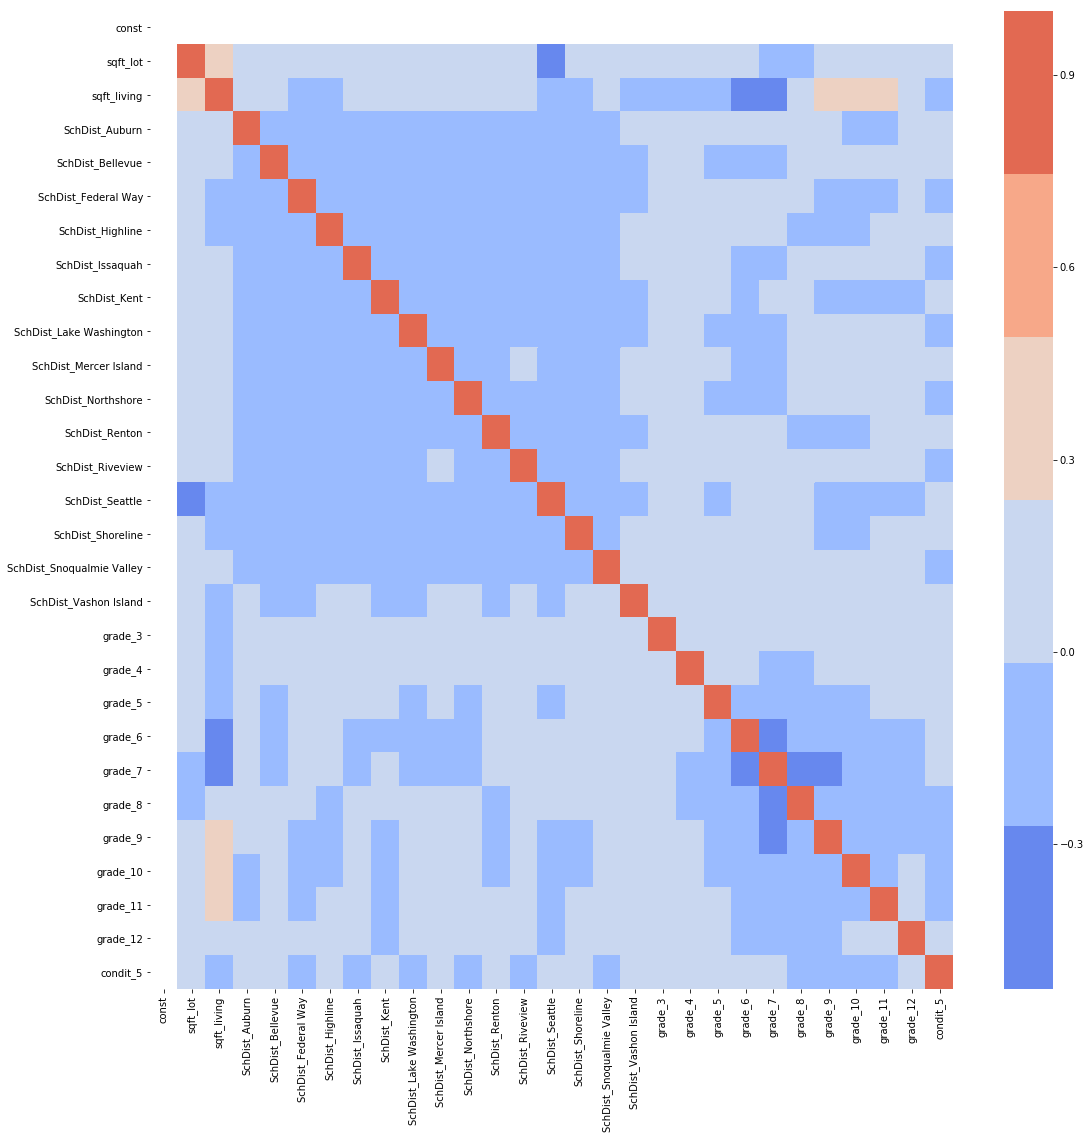

In [106]:
#Heatmap to check multicollinearity
corr = X.corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr, annot=False, fmt='.1g', cmap=sns.color_palette('coolwarm'))
plt.show()

No multicollinearity found after correlation analysis via heatmap

In [107]:
# #Generate Q2 - Model 1 - V2
linregQ2 = sm.OLS(y_train,X).fit()
linregQ2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     2340.
Date:                Mon, 29 Jul 2019   Prob (F-statistic):               0.00
Time:                        20:08:40   Log-Likelihood:                 180.69
No. Observations:               17136   AIC:                            -303.4
Df Residuals:                   17107   BIC:                            -78.66
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         9.6745      0.092    104.863      0.000       9.494       9.855
sqft_lot                      0.0488      0.003     19.485      0.000       0.044       0.054
sqft_living                   0.4858      0.007     70.658      0.000       0.472       0.499
SchDist_Auburn               -0.1350      0.014     -9.796      0.000      -0.162      -0.108
SchDist_Bellevue              0.6262      0.011     58.199      0.000       0.605       0.647
SchDist_Federal Way          -0.1316      0.011    -12.346      0.000      -0.153      -0.111
SchDist_Highline              0.1433      0.013     11.252      0.000       0.118       0.168
SchDist_Issaquah              0.3795      0.013     29.587      0.000       0.354       0.405
SchDist_Kent                 -0.0628      0.010     -6.129      0.000      -0.083      -0.043
SchDist_Lake Washington       0.4455      0.009     46.916      0.000       0.427       0.464
SchDist_Mercer Island         0.7686      0.018     42.933      0.000       0.734       0.804
SchDist_Northshore            0.2782      0.012     23.641      0.000       0.255       0.301
SchDist_Renton                0.1248      0.011     11.721      0.000       0.104       0.146
SchDist_Riveview              0.1614      0.017      9.506      0.000       0.128       0.195
SchDist_Seattle               0.5851      0.009     65.875      0.000       0.568       0.603
SchDist_Shoreline             0.3607      0.013     28.336      0.000       0.336       0.386
SchDist_Snoqualmie Valley     0.2361      0.013     17.661      0.000       0.210       0.262
SchDist_Vashon Island         0.3154      0.026     12.325      0.000       0.265       0.366
grade_3                      -0.8094      0.250     -3.233      0.001      -1.300      -0.319
grade_4                      -1.2382      0.087    -14.240      0.000      -1.409      -1.068
grade_5                      -1.3194      0.073    -18.134      0.000      -1.462      -1.177
grade_6                      -1.3031      0.071    -18.464      0.000      -1.441      -1.165
grade_7                      -1.1835      0.070    -16.906      0.000      -1.321      -1.046
grade_8                      -1.0413      0.070    -14.915      0.000      -1.178      -0.904
grade_9                      -0.8665      0.070    -12.424      0.000      -1.003      -0.730
grade_10                     -0.7335      0.070    -10.496      0.000      -0.870      -0.597
grade_11                     -0.5164      0.071     -7.307      0.000      -0.655      -0.378
grade_12                     -0.3255      0.075     -4.338      0.000      -0.473      -0.178
condit_5                      0.1103      0.007     16.010      0.000       0.097       0.124
===========================================================================

Plot residuals of version2 to see if they follow a normal distribution

In [108]:
Mod2_version3_resid = linregQ2.resid

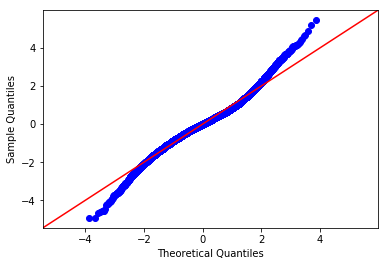

In [109]:
#QQ Plot of residuals
sm.graphics.qqplot(Mod2_version3_resid, dist = stats.norm, line = '45', fit = True)
plt.show()

### 3.1.3 Test Model

Q2 - Model 1 - V3 will be tested as it presented a reasonable QQ plot and good indexes om the OLS Summary

In [110]:
#Transform test variables before testing the model
for feat in ['sqft_lot', 'sqft_living']:
    X_test[feat] = X_test[feat].map(lambda x: np.log(x))

y_test = y_test.map(lambda x: np.log(x))

In [111]:
#linreg variable has the model from version 3
y_hat_train = linregQ2.predict(X)
y_hat_test = linregQ2.predict(X_test)

In [112]:
#get the residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

Compare your predicted values, $\hat y$ with the actual value, $y$ using the Mean Squared Error from both training and test dataset
        
   MSE = $\frac{1}{n}\sum_{i=1}^{n}(y_{i} - \hat y_{i})^2$

In [113]:
#Calculate the Mean Squarred Error
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: 0.05732801186211238
Test Mean Squarred Error: 0.05573436696494286


# 4. Q3: How does condition & grade affect house prices based on year built? 

In [136]:
#Create a copy of dataframe to work on Question 2
dfQ3 = df.copy()

In [131]:
dfQ3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 23 columns):
id                       21420 non-null int64
date                     21420 non-null datetime64[ns]
price                    21420 non-null float64
bedrooms                 21420 non-null int64
bathrooms                21420 non-null float64
sqft_living              21420 non-null int64
sqft_lot                 21420 non-null int64
floors                   21420 non-null float64
waterfront               21420 non-null category
view                     21420 non-null category
condition                21420 non-null category
grade                    21420 non-null category
sqft_above               21420 non-null int64
sqft_basement            21420 non-null float64
yr_renovated             21420 non-null category
zipcode                  21420 non-null category
lat                      21420 non-null float64
long                     21420 non-null float64
sqft_living15           

In [137]:
grade_dummies = pd.get_dummies(dfQ3['grade'], prefix='grade')
condition_dummies = pd.get_dummies(dfQ3['condition'], prefix='condit')

In [138]:
#Select the dataframe for Model 1: dummy variables for every zipcode
df_modelQ3 = dfQ3[['price', 'sqft_lot', 'sqft_living', 'yr_built_(1952, 1975]', 'yr_built_(1975, 1997]', 'yr_built_(1997, 2015]']].copy()
df_modelQ3 = pd.concat([df_modelQ3, grade_dummies, condition_dummies], axis=1) 
df_modelQ3 = df_modelQ3.drop(['grade_13'], axis=1) 
df_modelQ3 = df_modelQ3.drop(['condit_1'], axis=1)

In [139]:
df_modelQ3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 20 columns):
price                    21420 non-null float64
sqft_lot                 21420 non-null int64
sqft_living              21420 non-null int64
yr_built_(1952, 1975]    21420 non-null uint8
yr_built_(1975, 1997]    21420 non-null uint8
yr_built_(1997, 2015]    21420 non-null uint8
grade_3                  21420 non-null uint8
grade_4                  21420 non-null uint8
grade_5                  21420 non-null uint8
grade_6                  21420 non-null uint8
grade_7                  21420 non-null uint8
grade_8                  21420 non-null uint8
grade_9                  21420 non-null uint8
grade_10                 21420 non-null uint8
grade_11                 21420 non-null uint8
grade_12                 21420 non-null uint8
condit_2                 21420 non-null uint8
condit_3                 21420 non-null uint8
condit_4                 21420 non-null uint8
condit_5       

In [140]:
#Train/test split
y= df_modelQ3['price']
x= df_modelQ3.drop(['price'], axis=1)

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

X=sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

(17136, 19) (17136,)
(4284, 19) (4284,)


C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [141]:
linregQ3 = sm.OLS(y_train,X).fit()
linregQ3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     1654.
Date:                Mon, 29 Jul 2019   Prob (F-statistic):               0.00
Time:                        20:54:28   Log-Likelihood:            -2.3517e+05
No. Observations:               17136   AIC:                         4.704e+05
Df Residuals:                   17116   BIC:                         4.705e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3.104e+06   9.12e+04     34.042      0.000    2.93e+06    3.28e+06
sqft_lot                 -0.1901      0.042     -4.558      0.000      -0.272      -0.108
sqft_living             161.5152      2.943     54.887      0.000     155.747     167.283
yr_built_(1952, 1975] -1.511e+05   4970.881    -30.390      0.000   -1.61e+05   -1.41e+05
yr_built_(1975, 1997] -2.375e+05   5286.779    -44.924      0.000   -2.48e+05   -2.27e+05
yr_built_(1997, 2015] -2.167e+05   5802.443    -37.339      0.000   -2.28e+05   -2.05e+05
grade_3               -2.986e+06   2.34e+05    -12.761      0.000   -3.44e+06   -2.53e+06
grade_4                -2.98e+06    9.2e+04    -32.406      0.000   -3.16e+06    -2.8e+06
grade_5                   -3e+06   7.82e+04    -38.381      0.000   -3.15e+06   -2.85e+06
grade_6               -2.955e+06   7.65e+04    -38.641      0.000    -3.1e+06    -2.8e+06
grade_7               -2.849e+06   7.59e+04    -37.524      0.000      -3e+06    -2.7e+06
grade_8               -2.739e+06   7.56e+04    -36.220      0.000   -2.89e+06   -2.59e+06
grade_9                 -2.6e+06   7.53e+04    -34.537      0.000   -2.75e+06   -2.45e+06
grade_10              -2.399e+06   7.51e+04    -31.933      0.000   -2.55e+06   -2.25e+06
grade_11               -2.07e+06   7.54e+04    -27.447      0.000   -2.22e+06   -1.92e+06
grade_12              -1.482e+06   7.87e+04    -18.840      0.000   -1.64e+06   -1.33e+06
condit_2              -4.256e+04    5.2e+04     -0.819      0.413   -1.44e+05    5.93e+04
condit_3              -6284.8523   4.86e+04     -0.129      0.897   -1.02e+05     8.9e+04
condit_4               2.374e+04   4.86e+04      0.488      0.625   -7.16e+04    1.19e+05
condit_5               6.193e+04   4.89e+04      1.267      0.205   -3.39e+04    1.58e+05
==============================================================================
Omnibus:                    11319.085   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           534522.225
Skew:                           2.576   Prob(JB):                         0.00
Kurtosis:                      29.872   Cond. No.                     7.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Second attempt

In [142]:
#Select the dataframe for Model 1: dummy variables for every zipcode
df_modelQ3 = dfQ3[['price', 'sqft_lot', 'sqft_living', 'yr_built_(1952, 1975]', 'yr_built_(1975, 1997]', 'yr_built_(1997, 2015]']].copy()
df_modelQ3 = pd.concat([df_modelQ3, grade_dummies, condition_dummies], axis=1) 
df_modelQ3 = df_modelQ3.drop(['grade_13'], axis=1) 
df_modelQ3 = df_modelQ3.drop(['condit_1'], axis=1)
df_modelQ3 = df_modelQ3.drop(['condit_2'], axis=1)
df_modelQ3 = df_modelQ3.drop(['condit_3'], axis=1)
df_modelQ3 = df_modelQ3.drop(['condit_4'], axis=1)
df_modelQ3 = df_modelQ3.drop(['condit_5'], axis=1)

In [143]:
#Train/test split
y= df_modelQ3['price']
x= df_modelQ3.drop(['price'], axis=1)

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

X=sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

(17136, 15) (17136,)
(4284, 15) (4284,)


In [144]:
linregQ3 = sm.OLS(y_train,X).fit()
linregQ3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     1998.
Date:                Mon, 29 Jul 2019   Prob (F-statistic):               0.00
Time:                        20:57:09   Log-Likelihood:            -2.3533e+05
No. Observations:               17136   AIC:                         4.707e+05
Df Residuals:                   17120   BIC:                         4.708e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.564e+06   6.79e+04     37.758      0.000    2.43e+06     2.7e+06
sqft_lot                 -0.1989      0.041     -4.805      0.000      -0.280      -0.118
sqft_living             159.5944      2.945     54.185      0.000     153.821     165.368
yr_built_(1952, 1975] -1.495e+05   4994.943    -29.921      0.000   -1.59e+05    -1.4e+05
yr_built_(1975, 1997] -2.473e+05   5215.087    -47.428      0.000   -2.58e+05   -2.37e+05
yr_built_(1997, 2015] -2.385e+05   5447.811    -43.771      0.000   -2.49e+05   -2.28e+05
grade_3               -2.383e+06   2.33e+05    -10.232      0.000   -2.84e+06   -1.93e+06
grade_4               -2.433e+06   8.38e+04    -29.040      0.000    -2.6e+06   -2.27e+06
grade_5               -2.447e+06    6.9e+04    -35.452      0.000   -2.58e+06   -2.31e+06
grade_6               -2.399e+06   6.71e+04    -35.760      0.000   -2.53e+06   -2.27e+06
grade_7               -2.292e+06   6.65e+04    -34.454      0.000   -2.42e+06   -2.16e+06
grade_8                -2.18e+06   6.62e+04    -32.936      0.000   -2.31e+06   -2.05e+06
grade_9               -2.037e+06   6.59e+04    -30.929      0.000   -2.17e+06   -1.91e+06
grade_10              -1.835e+06   6.57e+04    -27.918      0.000   -1.96e+06   -1.71e+06
grade_11               -1.54e+06   6.61e+04    -23.306      0.000   -1.67e+06   -1.41e+06
grade_12              -1.024e+06   6.95e+04    -14.731      0.000   -1.16e+06   -8.88e+05
==============================================================================
Omnibus:                    12123.066   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           638720.695
Skew:                           2.830   Prob(JB):                         0.00
Kurtosis:                      32.369   Cond. No.                     6.65e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.65e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Third attempt - log transform

In [145]:
#Select the dataframe for Model 1: dummy variables for every zipcode
df_modelQ3 = dfQ3[['price', 'sqft_lot', 'sqft_living', 'yr_built_(1952, 1975]', 'yr_built_(1975, 1997]', 'yr_built_(1997, 2015]']].copy()
df_modelQ3 = pd.concat([df_modelQ3, grade_dummies, condition_dummies], axis=1) 
df_modelQ3 = df_modelQ3.drop(['grade_13'], axis=1) 
df_modelQ3 = df_modelQ3.drop(['condit_1'], axis=1)
df_modelQ3 = df_modelQ3.drop(['condit_2'], axis=1)
df_modelQ3 = df_modelQ3.drop(['condit_3'], axis=1)
df_modelQ3 = df_modelQ3.drop(['condit_4'], axis=1)
df_modelQ3 = df_modelQ3.drop(['condit_5'], axis=1)

In [146]:
#Train/test split
y= df_modelQ3['price']
x= df_modelQ3.drop(['price'], axis=1)

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

X=sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

(17136, 15) (17136,)
(4284, 15) (4284,)


In [147]:
#Log transform continuous variables to see if residuals follow a normal distribution
for feat in ['sqft_lot', 'sqft_living']:
    X[feat] = X[feat].map(lambda x: np.log(x))

y_train = y_train.map(lambda x: np.log(x))

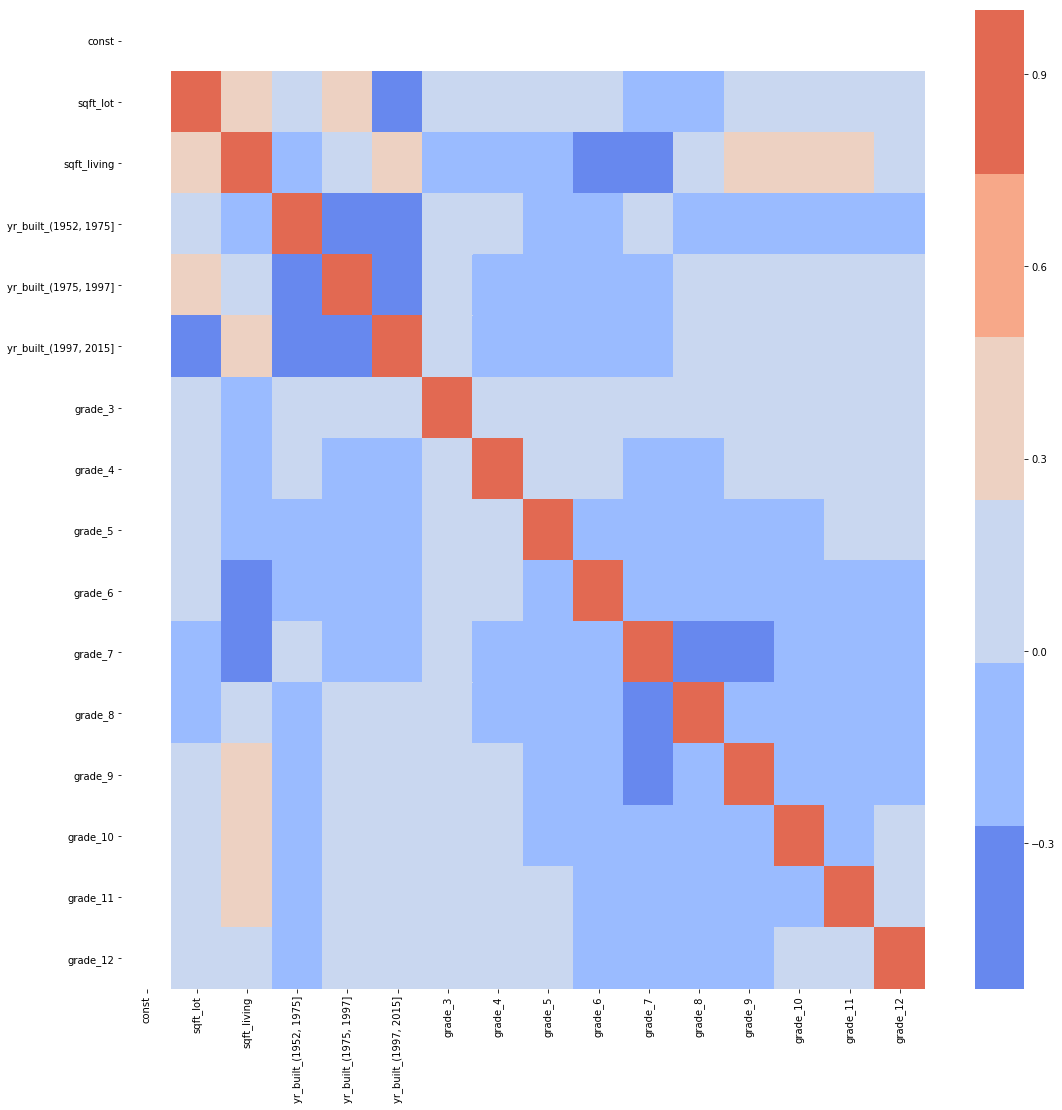

In [148]:
#Heatmap to check multicollinearity
corr = X.corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr, annot=False, fmt='.1g', cmap=sns.color_palette('coolwarm'))
plt.show()

In [149]:
# #Generate Q3 - Model 1 - V3
linregQ3 = sm.OLS(y_train,X).fit()
linregQ3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     1991.
Date:                Mon, 29 Jul 2019   Prob (F-statistic):               0.00
Time:                        21:01:19   Log-Likelihood:                -4693.3
No. Observations:               17136   AIC:                             9419.
Df Residuals:                   17120   BIC:                             9543.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.3135      0.123     92.072      0.000      11.073      11.554
sqft_lot                 -0.0390      0.003    -11.896      0.000      -0.045      -0.033
sqft_living               0.4919      0.009     54.017      0.000       0.474       0.510
yr_built_(1952, 1975]    -0.2865      0.007    -39.403      0.000      -0.301      -0.272
yr_built_(1975, 1997]    -0.4112      0.008    -53.957      0.000      -0.426      -0.396
yr_built_(1997, 2015]    -0.4059      0.008    -51.177      0.000      -0.421      -0.390
grade_3                  -1.5444      0.333     -4.633      0.000      -2.198      -0.891
grade_4                  -1.9066      0.121    -15.704      0.000      -2.145      -1.669
grade_5                  -1.9865      0.101    -19.760      0.000      -2.184      -1.789
grade_6                  -1.7963      0.098    -18.395      0.000      -1.988      -1.605
grade_7                  -1.5251      0.097    -15.735      0.000      -1.715      -1.335
grade_8                  -1.2722      0.097    -13.159      0.000      -1.462      -1.083
grade_9                  -1.0144      0.097    -10.502      0.000      -1.204      -0.825
grade_10                 -0.7791      0.097     -8.049      0.000      -0.969      -0.589
grade_11                 -0.5189      0.098     -5.308      0.000      -0.711      -0.327
grade_12                 -0.2524      0.104     -2.438      0.015      -0.455      -0.049
==============================================================================
Omnibus:                       67.060   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.916
Skew:                          -0.022   Prob(JB):                     1.81e-20
Kurtosis:                       3.354   Cond. No.                     1.79e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [150]:
Q3_resid = linregQ3.resid

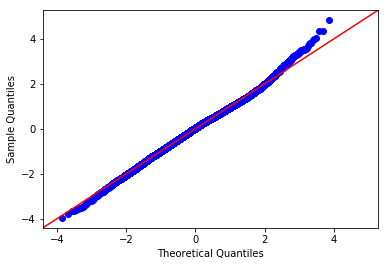

In [151]:
#QQ Plot of residuals
sm.graphics.qqplot(Q3_resid, dist = stats.norm, line = '45', fit = True)
plt.show()

TEST MODEL